## DA312 - Lab Assignment 4
### By Rishita Agarwal, 220150016

In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support


In [3]:
data = pd.read_csv(r"C:\Users\Rishita\Desktop\Advanced-Machine-Learning-Laboratory\Lab 4\ISIC_2019_Training_GroundTruth.csv")
data

image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0      ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1      ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2      ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3      ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4      ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
...             ...  ...  ...  ...  ...  ...  ...   ...  ...  ...
25326  ISIC_0073247  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0
25327  ISIC_0073248  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0
25328  ISIC_0073249  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25329  ISIC_0073251  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25330  ISIC_0073254  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0

[25331 rows x 10 columns]

In [4]:
metadata = pd.read_csv(r"C:\Users\Rishita\Desktop\Advanced-Machine-Learning-Laboratory\Lab 4\ISIC_2019_Training_Metadata.csv")
metadata

image  age_approx anatom_site_general    lesion_id     sex
0      ISIC_0000000        55.0      anterior torso          NaN  female
1      ISIC_0000001        30.0      anterior torso          NaN  female
2      ISIC_0000002        60.0     upper extremity          NaN  female
3      ISIC_0000003        30.0     upper extremity          NaN    male
4      ISIC_0000004        80.0     posterior torso          NaN    male
...             ...         ...                 ...          ...     ...
25326  ISIC_0073247        85.0           head/neck  BCN_0003925  female
25327  ISIC_0073248        65.0      anterior torso  BCN_0001819    male
25328  ISIC_0073249        70.0     lower extremity  BCN_0001085    male
25329  ISIC_0073251        55.0         palms/soles  BCN_0002083  female
25330  ISIC_0073254        50.0     upper extremity  BCN_0001079    male

[25331 rows x 5 columns]

In [6]:
image_dir = r"C:\Users\Rishita\Desktop\DA312\ISIC_2019_Training_Input\ISIC_2019_Training_Input"

In [ ]:
def analyze_dataset(image_dir):
 
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg'))]
    
    print(f"Total number of images: {len(image_files)}")
    
    sizes = []
    modes = []
    i = 0
    for img_file in image_files:  
        img_path = os.path.join(image_dir, img_file)
        print("processing image: ", i)
        i = i+1
        with Image.open(img_path) as img:
            
            sizes.append(img.size)
            modes.append(img.mode)
    
    # Print statistics
    print("\nImage Statistics:")
    print(f"Unique image sizes: {set(sizes)}")
    print(f"Image modes: {set(modes)}")

analyze_dataset(image_dir)

In [ ]:
def display_sample_images(image_dir, num_images=9):
    image_files_all = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg'))]
    print("Number of image files: ", len(image_files_all))
    
    image_files = sorted(image_files_all)[:num_images]
    
    rows = (num_images + 2) // 3
    
    plt.figure(figsize=(15, 5*rows))
    
    for idx, img_name in enumerate(image_files, 1):
        img_path = os.path.join(image_dir, img_name)
        img = Image.open(img_path).convert('RGB')
        
        plt.subplot(rows, 3, idx)
        plt.imshow(img)
        plt.title(f'Image: {img_name}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


Number of image files:  25331


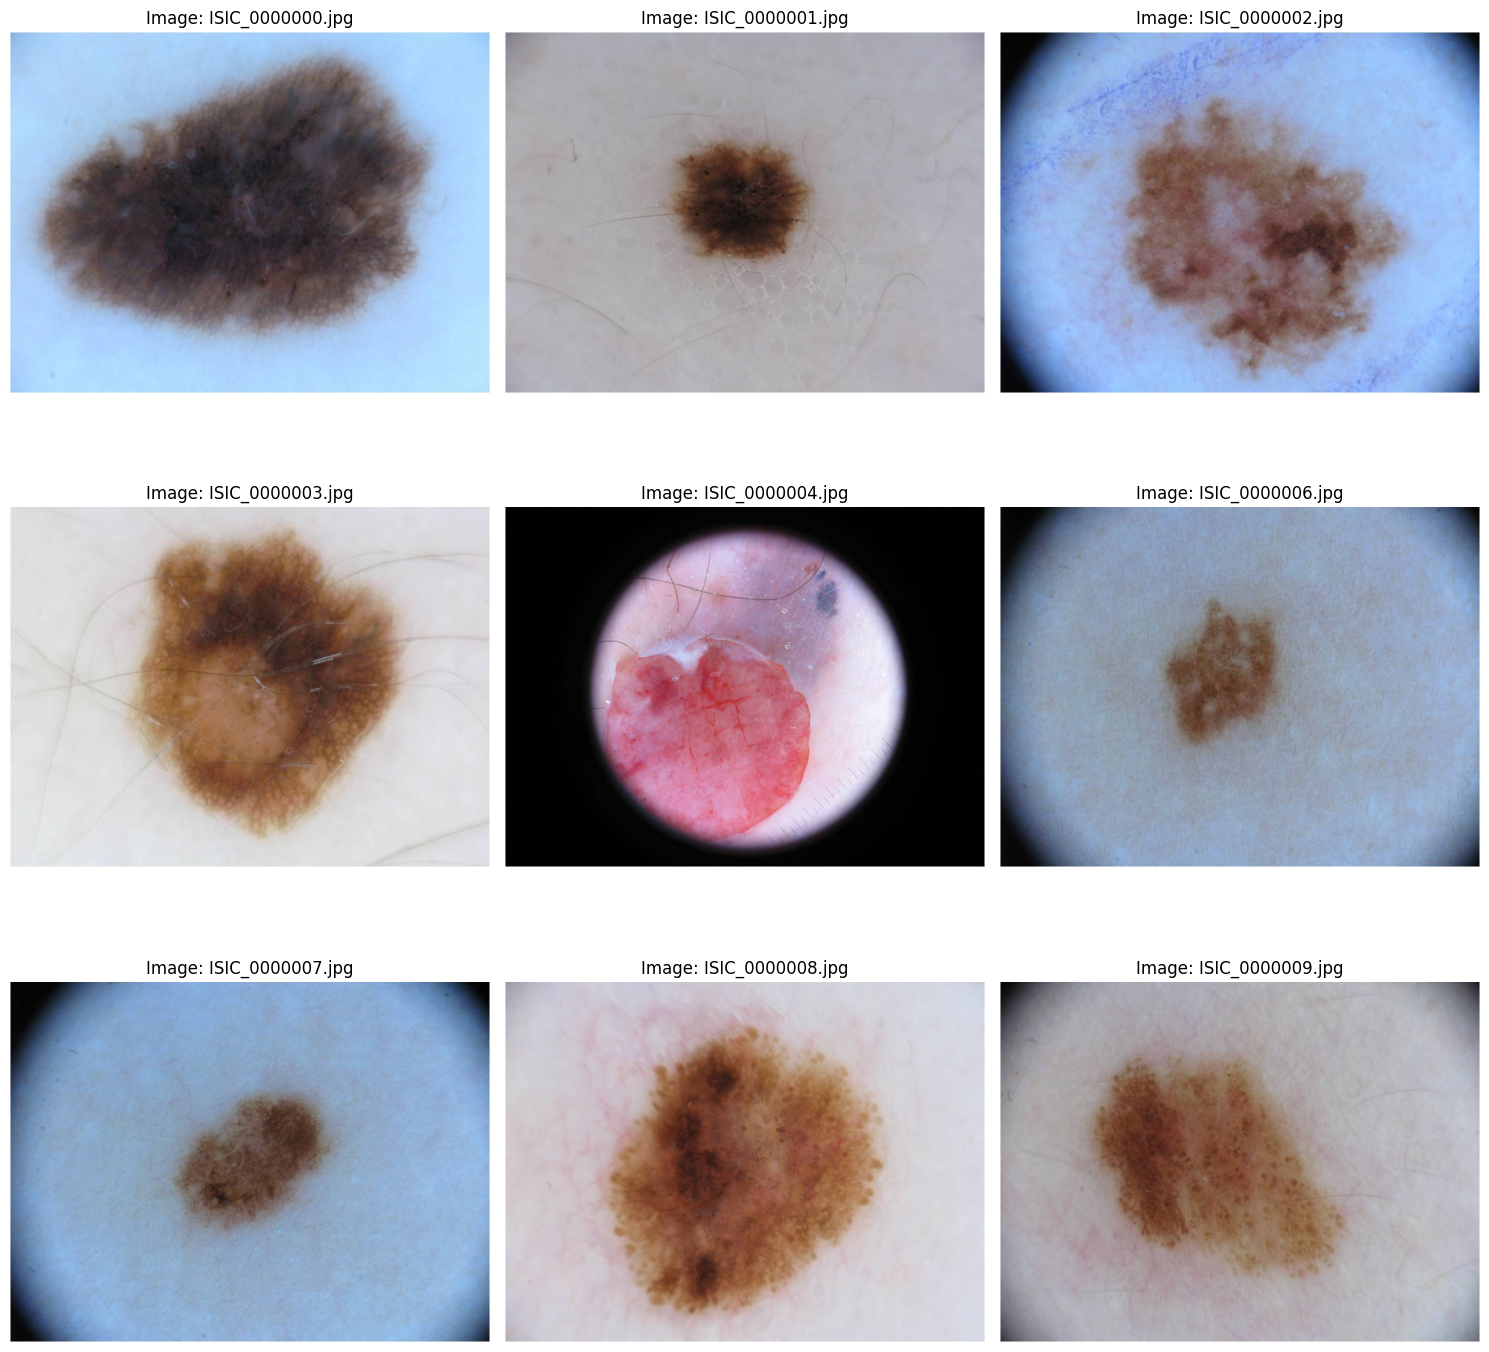

In [18]:
display_sample_images(image_dir)

In [9]:
def analyze_dataset():
    class_counts = {
        'MEL': data['MEL'].sum(),
        'NV': data['NV'].sum(),
        'BCC': data['BCC'].sum(),
        'AK': data['AK'].sum(),
        'BKL': data['BKL'].sum(),
        'DF': data['DF'].sum(),
        'VASC': data['VASC'].sum(),
        'SCC': data['SCC'].sum(),
        'UNK': data['UNK'].sum()
    }
    
    age_stats = metadata['age_approx'].describe()
    gender_dist = metadata['sex'].value_counts()
    anatomical_sites = metadata['anatom_site_general'].value_counts()
    
    return class_counts, age_stats, gender_dist, anatomical_sites

def plot_distributions():
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    sns.barplot(data=pd.DataFrame(class_counts.items(), columns=['Class', 'Count']))
    plt.title('Distribution of Lesion Classes')
    plt.xticks(rotation=45)
    
    plt.subplot(2, 2, 2)
    sns.histplot(metadata['age_approx'])
    plt.title('Age Distribution')
    
    plt.subplot(2, 2, 3)
    sns.barplot(x=gender_dist.index, y=gender_dist.values)
    plt.title('Gender Distribution')
    
    plt.subplot(2, 2, 4)
    sns.barplot(x=anatomical_sites.values, y=anatomical_sites.index)
    plt.title('Anatomical Sites Distribution')
    
    plt.tight_layout()
    plt.show()

In [12]:
analyze_dataset()

({'MEL': 4522.0,
  'NV': 12875.0,
  'BCC': 3323.0,
  'AK': 867.0,
  'BKL': 2624.0,
  'DF': 239.0,
  'VASC': 253.0,
  'SCC': 628.0,
  'UNK': 0.0},
 count    24894.000000
 mean        54.028481
 std         18.130971
 min          0.000000
 25%         40.000000
 50%         55.000000
 75%         70.000000
 max         85.000000
 Name: age_approx, dtype: float64,
 sex
 male      13286
 female    11661
 Name: count, dtype: int64,
 anatom_site_general
 anterior torso     6915
 lower extremity    4990
 head/neck          4587
 upper extremity    2910
 posterior torso    2787
 palms/soles         398
 oral/genital         59
 lateral torso        54
 Name: count, dtype: int64)

In [9]:
merged_df = pd.merge(metadata, data, on='image')
merged_df

image  age_approx anatom_site_general    lesion_id     sex  MEL  \
0      ISIC_0000000        55.0      anterior torso          NaN  female  0.0   
1      ISIC_0000001        30.0      anterior torso          NaN  female  0.0   
2      ISIC_0000002        60.0     upper extremity          NaN  female  1.0   
3      ISIC_0000003        30.0     upper extremity          NaN    male  0.0   
4      ISIC_0000004        80.0     posterior torso          NaN    male  1.0   
...             ...         ...                 ...          ...     ...  ...   
25326  ISIC_0073247        85.0           head/neck  BCN_0003925  female  0.0   
25327  ISIC_0073248        65.0      anterior torso  BCN_0001819    male  0.0   
25328  ISIC_0073249        70.0     lower extremity  BCN_0001085    male  1.0   
25329  ISIC_0073251        55.0         palms/soles  BCN_0002083  female  0.0   
25330  ISIC_0073254        50.0     upper extremity  BCN_0001079    male  0.0   

        NV  BCC   AK  BKL   DF  VASC  SCC  UNK  
0      1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
1      1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
3      1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
...    ...  ...  ...  ...  ...   ...  ...  ...  
25326  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0  
25327  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0  
25328  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
25329  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
25330  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0  

[25331 rows x 14 columns]

In [122]:
diagnoses = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']
# removing UNK as no sample available for it

## Age distribution

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


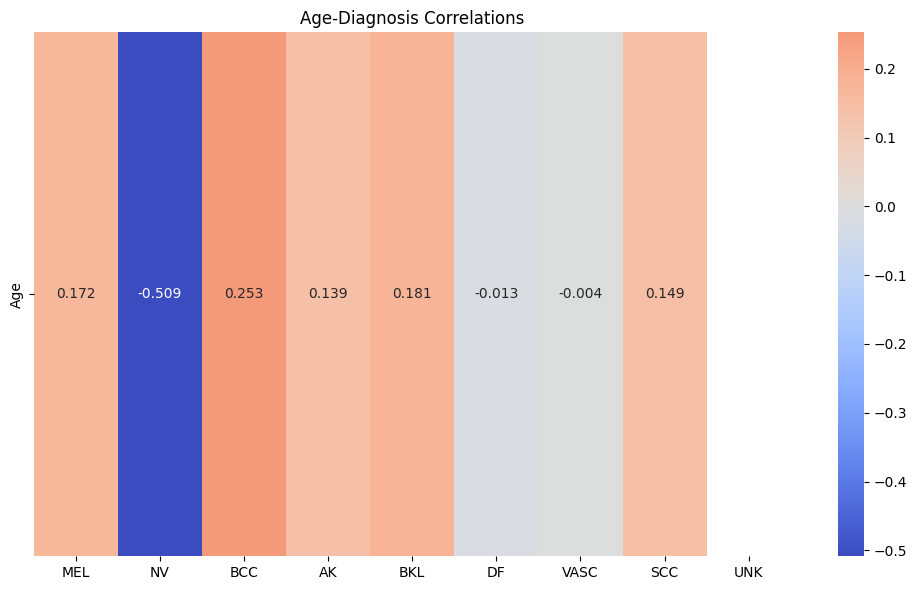


Correlations with Age:
MEL: 0.172
NV: -0.509
BCC: 0.253
AK: 0.139
BKL: 0.181
DF: -0.013
VASC: -0.004
SCC: 0.149
UNK: nan


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [115]:
# Create correlation dataframe
correlations = []

# Calculate correlation for each diagnosis
for diagnosis in diagnoses:
    corr = merged_df['age_approx'].corr(merged_df[diagnosis])
    correlations.append(corr)

# Create correlation dataframe
correlations_df = pd.DataFrame(correlations, index=diagnoses, columns=['Correlation'])

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlations_df.values.reshape(1, -1), 
            annot=True, 
            cmap='coolwarm',
            xticklabels=diagnoses,
            yticklabels=['Age'],
            fmt='.3f',
            center=0)
plt.title('Age-Diagnosis Correlations')
plt.tight_layout()
plt.show()

# Print correlations for better visibility
print("\nCorrelations with Age:")
for diagnosis in diagnoses:
    corr = merged_df['age_approx'].corr(merged_df[diagnosis])
    print(f"{diagnosis}: {corr:.3f}")

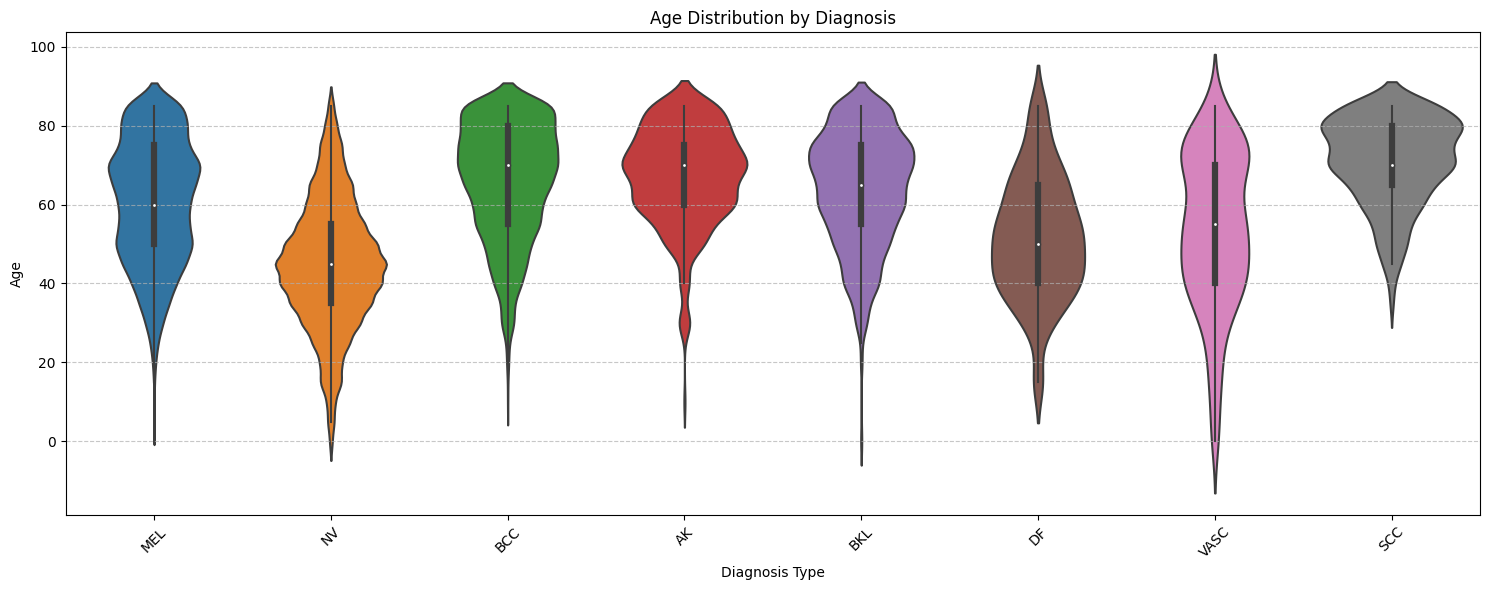


Age Statistics by Diagnosis:

MEL:
Mean age: 60.7
Median age: 60.0
Std dev: 15.6
Count: 4522

NV:
Mean age: 44.9
Median age: 45.0
Std dev: 16.0
Count: 12875

BCC:
Mean age: 65.7
Median age: 70.0
Std dev: 14.8
Count: 3323

AK:
Mean age: 67.3
Median age: 70.0
Std dev: 12.4
Count: 867

BKL:
Mean age: 63.7
Median age: 65.0
Std dev: 14.5
Count: 2624

DF:
Mean age: 51.7
Median age: 50.0
Std dev: 15.4
Count: 239

VASC:
Mean age: 53.2
Median age: 55.0
Std dev: 19.8
Count: 253

SCC:
Mean age: 70.8
Median age: 70.0
Std dev: 11.1
Count: 628

UNK:
Mean age: nan
Median age: nan
Std dev: nan
Count: 0


In [120]:
plot_data=[]
for diagnosis in diagnoses:
    # Get ages where this diagnosis is positive (equals 1)
    ages = merged_df[merged_df[diagnosis] == 1]['age_approx']
    
    # Create a dataframe with age and diagnosis label
    temp_df = pd.DataFrame({
        'age_approx': ages,
        'diagnosis': diagnosis
    })
    
    plot_data.append(temp_df)

# Combine all the data
plot_df = pd.concat(plot_data, ignore_index=True)

# Create violin plot
plt.figure(figsize=(15, 6))
sns.violinplot(x='diagnosis', y='age_approx', data=plot_df)

# Customize plot
plt.xticks(rotation=45)
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Diagnosis Type')
plt.ylabel('Age')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics
print("\nAge Statistics by Diagnosis:")
for diagnosis in diagnoses:
    ages = merged_df[merged_df[diagnosis] == 1]['age_approx']
    print(f"\n{diagnosis}:")
    print(f"Mean age: {ages.mean():.1f}")
    print(f"Median age: {ages.median():.1f}")
    print(f"Std dev: {ages.std():.1f}")
    print(f"Count: {len(ages)}")

#### Shows that Melanocytic nevus (NV) is probably more prominant in working age groups whereas Basal cell carcinoma (BCC),Squamous cell carcinoma (SCC) and Benign keratosis (BKL) are more prominant in older age groups.


## Gender Based distribution

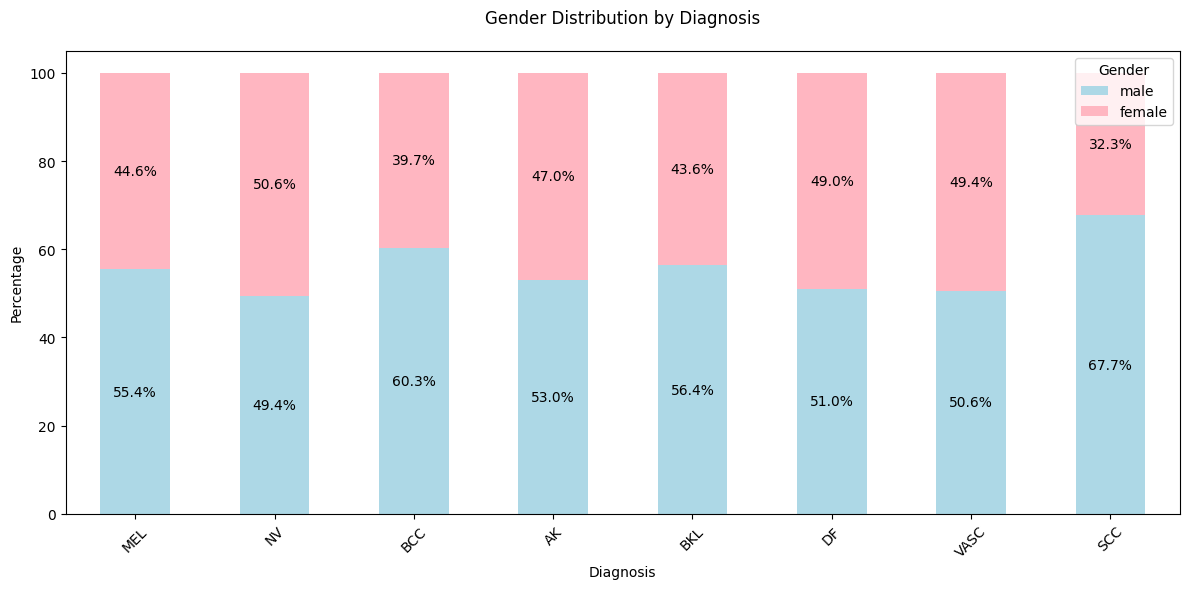


Gender Distribution by Diagnosis:

MEL:
Total cases: 4522
Male: 2461 (54.4%)
Female: 1980 (43.8%)

NV:
Total cases: 12875
Male: 6225 (48.3%)
Female: 6379 (49.5%)

BCC:
Total cases: 3323
Male: 2000 (60.2%)
Female: 1317 (39.6%)

AK:
Total cases: 867
Male: 458 (52.8%)
Female: 406 (46.8%)

BKL:
Total cases: 2624
Male: 1467 (55.9%)
Female: 1134 (43.2%)

DF:
Total cases: 239
Male: 122 (51.0%)
Female: 117 (49.0%)

VASC:
Total cases: 253
Male: 128 (50.6%)
Female: 125 (49.4%)

SCC:
Total cases: 628
Male: 425 (67.7%)
Female: 203 (32.3%)


In [123]:

gender_dist = []

for diagnosis in diagnoses:
    # Get gender counts for positive cases of this diagnosis
    gender_counts = merged_df[merged_df[diagnosis] == 1]['sex'].value_counts()
    total = gender_counts.sum()
    
    # Calculate percentages
    gender_percentages = (gender_counts / total) * 100
    
    # Create a dictionary with the results
    gender_dist.append({
        'diagnosis': diagnosis,
        'male': gender_percentages.get('male', 0),
        'female': gender_percentages.get('female', 0)
    })

# Convert to DataFrame
gender_df = pd.DataFrame(gender_dist)
gender_df.set_index('diagnosis', inplace=True)

# Create stacked bar plot
ax = gender_df.plot(kind='bar', 
                   stacked=True, 
                   figsize=(12, 6),
                   color=['lightblue', 'lightpink'])

# Customize plot
plt.title('Gender Distribution by Diagnosis', pad=20)
plt.xlabel('Diagnosis')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.xticks(rotation=45)

# Add percentage labels on bars
for c in ax.containers:
    # Add percentage labels
    ax.bar_label(c, fmt='%.1f%%', label_type='center')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print detailed statistics
print("\nGender Distribution by Diagnosis:")
for diagnosis in diagnoses:
    total = merged_df[merged_df[diagnosis] == 1].shape[0]
    male_count = merged_df[(merged_df[diagnosis] == 1) & (merged_df['sex'] == 'male')].shape[0]
    female_count = merged_df[(merged_df[diagnosis] == 1) & (merged_df['sex'] == 'female')].shape[0]
    
    print(f"\n{diagnosis}:")
    print(f"Total cases: {total}")
    print(f"Male: {male_count} ({(male_count/total)*100:.1f}%)")
    print(f"Female: {female_count} ({(female_count/total)*100:.1f}%)")

#### We can see that SCC and BCC are more prominant in men whereas NV is almost equal for both genders

## Anatomical Site analysis

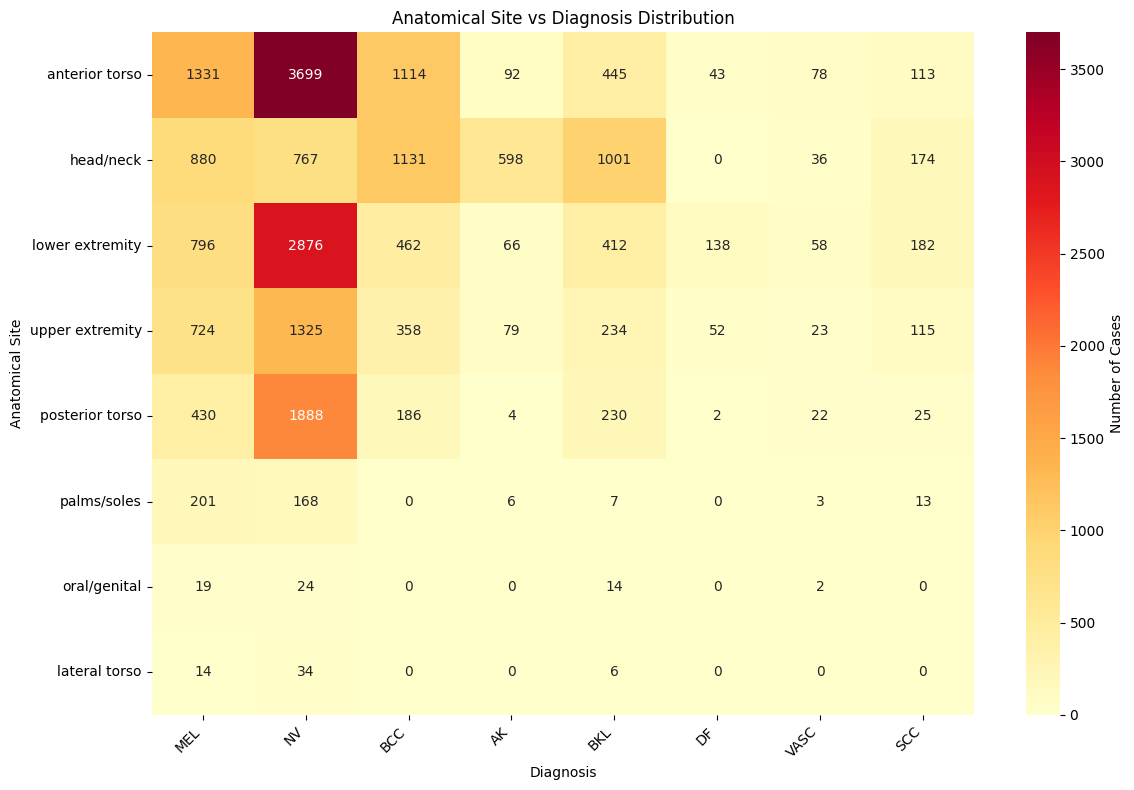


Detailed Distribution Statistics:

Total cases by diagnosis:
MEL: 4522
NV: 12875
BCC: 3323
AK: 867
BKL: 2624
DF: 239
VASC: 253
SCC: 628

Percentage distribution by anatomical site for each diagnosis:

MEL:
anterior torso: 29.4%
head/neck: 19.5%
lower extremity: 17.6%
upper extremity: 16.0%
posterior torso: 9.5%
palms/soles: 4.4%
oral/genital: 0.4%
lateral torso: 0.3%

NV:
anterior torso: 28.7%
lower extremity: 22.3%
posterior torso: 14.7%
upper extremity: 10.3%
head/neck: 6.0%
palms/soles: 1.3%
lateral torso: 0.3%
oral/genital: 0.2%

BCC:
head/neck: 34.0%
anterior torso: 33.5%
lower extremity: 13.9%
upper extremity: 10.8%
posterior torso: 5.6%

AK:
head/neck: 69.0%
anterior torso: 10.6%
upper extremity: 9.1%
lower extremity: 7.6%
palms/soles: 0.7%
posterior torso: 0.5%

BKL:
head/neck: 38.1%
anterior torso: 17.0%
lower extremity: 15.7%
upper extremity: 8.9%
posterior torso: 8.8%
oral/genital: 0.5%
palms/soles: 0.3%
lateral torso: 0.2%

DF:
lower extremity: 57.7%
upper extremity: 21.8%

In [124]:
# Create crosstab between anatomical sites and diagnoses
site_diagnosis = pd.DataFrame()
for diagnosis in diagnoses:
    # Count cases for each anatomical site where diagnosis is positive
    site_counts = merged_df[merged_df[diagnosis] == 1]['anatom_site_general'].value_counts()
    site_diagnosis[diagnosis] = site_counts

# Fill NaN values with 0
site_diagnosis = site_diagnosis.fillna(0)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(site_diagnosis, 
            annot=True,
            fmt='.0f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Number of Cases'})

# Customize plot
plt.title('Anatomical Site vs Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Anatomical Site')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

# Print detailed statistics
print("\nDetailed Distribution Statistics:")
print("\nTotal cases by diagnosis:")
for diagnosis in diagnoses:
    total = merged_df[merged_df[diagnosis] == 1].shape[0]
    print(f"{diagnosis}: {total}")

print("\nPercentage distribution by anatomical site for each diagnosis:")
for diagnosis in diagnoses:
    print(f"\n{diagnosis}:")
    site_percentages = (merged_df[merged_df[diagnosis] == 1]['anatom_site_general'].value_counts() / 
                       merged_df[merged_df[diagnosis] == 1].shape[0] * 100)
    for site, percentage in site_percentages.items():
        print(f"{site}: {percentage:.1f}%")

## Lesion Location patterns

In [126]:
import plotly.graph_objects as go

restructured_data = []

# Process each diagnosis
for diagnosis in diagnoses:
    # Get cases where this diagnosis is positive
    cases = merged_df[merged_df[diagnosis] == 1]
    
    # Count anatomical sites for this diagnosis
    site_counts = cases['anatom_site_general'].value_counts()
    
    # Add diagnosis as parent node
    restructured_data.append({
        'label': diagnosis,
        'parent': '',
        'value': len(cases)
    })
    
    # Add anatomical sites as child nodes
    for site, count in site_counts.items():
        restructured_data.append({
            'label': f"{diagnosis}-{site}",
            'parent': diagnosis,
            'value': count
        })

# Create lists for sunburst plot
labels = [item['label'] for item in restructured_data]
parents = [item['parent'] for item in restructured_data]
values = [item['value'] for item in restructured_data]

# Create sunburst plot
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
))

# Update layout
fig.update_layout(
    title="Distribution of Diagnoses and Anatomical Sites",
    width=800,
    height=800,
)

# Show plot
fig.show()

# Print statistics
print("\nDiagnosis and Anatomical Site Distribution:")
for diagnosis in ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']:
    cases = merged_df[merged_df[diagnosis] == 1]
    print(f"\n{diagnosis} Total Cases: {len(cases)}")
    site_counts = cases['anatom_site_general'].value_counts()
    for site, count in site_counts.items():
        percentage = (count / len(cases)) * 100
        print(f"  {site}: {count} cases ({percentage:.1f}%)")


Diagnosis and Anatomical Site Distribution:

MEL Total Cases: 4522
  anterior torso: 1331 cases (29.4%)
  head/neck: 880 cases (19.5%)
  lower extremity: 796 cases (17.6%)
  upper extremity: 724 cases (16.0%)
  posterior torso: 430 cases (9.5%)
  palms/soles: 201 cases (4.4%)
  oral/genital: 19 cases (0.4%)
  lateral torso: 14 cases (0.3%)

NV Total Cases: 12875
  anterior torso: 3699 cases (28.7%)
  lower extremity: 2876 cases (22.3%)
  posterior torso: 1888 cases (14.7%)
  upper extremity: 1325 cases (10.3%)
  head/neck: 767 cases (6.0%)
  palms/soles: 168 cases (1.3%)
  lateral torso: 34 cases (0.3%)
  oral/genital: 24 cases (0.2%)

BCC Total Cases: 3323
  head/neck: 1131 cases (34.0%)
  anterior torso: 1114 cases (33.5%)
  lower extremity: 462 cases (13.9%)
  upper extremity: 358 cases (10.8%)
  posterior torso: 186 cases (5.6%)

AK Total Cases: 867
  head/neck: 598 cases (69.0%)
  anterior torso: 92 cases (10.6%)
  upper extremity: 79 cases (9.1%)
  lower extremity: 66 cases (7.6

### Observations
1. Class distribution -
* Highly imbalanced dataset
* NV (Nevus) is dominant with 12,875 cases (51.7%)
* ME L (Melanoma) is second most common with 4,522 cases (18.2%)
* BCC (Basal Cell Carcinoma) with 3,323 cases (13.3%)
* Very few cases of DF (Dermatofibroma, 239) and VASC (Vascular lesions, 253)
* No UNK (Unknown) cases

2. Gender distribution - Relatively balanced, Slightly more males (13,286, 53.3%) than females (11,661, 46.7%)
   
3. Age distribution - Fairly normal distribution
   
4. Most common sites:
* Anterior torso (6,915 cases, 27.8%)
* Lower extremity (4,990 cases, 20%)
* Head/neck (4,587 cases, 18.4%)

## Resnet model

## Problem that the resnet model solves
This is similar to what happens in deep neural networks, where adding more layers paradoxically can lead to worse performance. This is called the degradation problem.
ResNet solves this problem through a clever architectural innovation called skip connections or residual connections. Instead of forcing each layer to learn the complete transformation, ResNet lets layers learn just the difference (residual) between input and output

In [10]:
torch.cuda.is_available()

True

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        # Data augmentation
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        # Normalization
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [32]:
class ISICDataset(Dataset):
    def __init__(self, image_dir, ground_truth_df, transform=None):
        self.image_dir = image_dir
        self.ground_truth = ground_truth_df
        self.transform = transform
        self.classes = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']
        
    def __len__(self):
        return len(self.ground_truth)
        
    def __getitem__(self, idx):
        img_name = self.ground_truth.iloc[idx]['image']
        img_path = os.path.join(self.image_dir, f"{img_name}.jpg")
        image = Image.open(img_path).convert('RGB')
        
        labels = torch.tensor([
            self.ground_truth.iloc[idx][class_name] 
            for class_name in self.classes
        ]).float()
        
        if self.transform:
            image = self.transform(image)
            
        return image, labels

In [39]:
dataset = ISICDataset(
        image_dir=r"C:\Users\Rishita\Desktop\DA312\ISIC_2019_Training_Input\ISIC_2019_Training_Input",
        ground_truth_df=data,
        transform=transform
    )
dataset

In [ ]:
def load_and_preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],  
            std=[0.229, 0.224, 0.225]    
        )
    ])
    
    img = Image.open(image_path).convert('RGB')
    x = transform(img)
    x = x.unsqueeze(0)  
    # The .unsqueeze(0) adds an extra dimension to make the tensor shape [1, 3, 224, 224], where:
    # 1 is the batch size (we're processing one image), 3 represents the RGB channels, 224, 224 are the height and width
    
    return x

In [37]:
check_img = r"C:\Users\Rishita\Desktop\DA312\ISIC_2019_Training_Input\ISIC_2019_Training_Input\ISIC_0000000.jpg"

In [18]:
image_tensor = load_and_preprocess_image(check_img)
print(image_tensor.shape)

torch.Size([1, 3, 224, 224])


In [38]:
load_and_preprocess_image(check_img)

tensor([[[[1.0159, 0.7248, 0.7933,  ..., 0.8447, 0.8104, 1.0673],
          [0.6906, 0.3138, 0.4508,  ..., 0.4508, 0.3994, 0.6906],
          [0.6392, 0.2796, 0.3994,  ..., 0.4851, 0.4337, 0.7419],
          ...,
          [0.9132, 0.6563, 0.6221,  ..., 0.9303, 0.9303, 1.2043],
          [0.8276, 0.6049, 0.5707,  ..., 0.9303, 0.8961, 1.1358],
          [1.2214, 1.0331, 0.9988,  ..., 1.3927, 1.2728, 1.3927]],

         [[1.4832, 1.3782, 1.3782,  ..., 1.6583, 1.6408, 1.7283],
          [1.2556, 1.0630, 1.1331,  ..., 1.5007, 1.4657, 1.5707],
          [1.3081, 1.1681, 1.2206,  ..., 1.5007, 1.4482, 1.5707],
          ...,
          [1.6232, 1.5182, 1.5707,  ..., 1.9559, 1.9559, 1.9559],
          [1.5882, 1.5007, 1.5532,  ..., 1.9384, 1.9209, 1.9559],
          [1.6933, 1.6408, 1.6758,  ..., 1.9909, 1.9909, 2.0259]],

         [[2.0300, 2.0648, 2.0300,  ..., 2.4483, 2.4831, 2.3611],
          [2.0474, 2.0823, 2.1346,  ..., 2.5877, 2.6051, 2.4308],
          [2.0474, 2.1346, 2.1520,  ..., 2

In [40]:

class ISICResNet(nn.Module):
    def __init__(self, model_name='resnet50', pretrained=True, num_classes=9):
        super(ISICResNet, self).__init__()
        
        #pretrained model
        if model_name == 'resnet50':
            self.resnet = models.resnet50(pretrained=pretrained)
        elif model_name == 'resnet34':
            self.resnet = models.resnet34(pretrained=pretrained)
        elif model_name == 'resnet18':
            self.resnet = models.resnet18(pretrained=pretrained)
        
        #final layer replaced
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Linear(num_ftrs, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, num_classes),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.resnet(x)

In [41]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader =DataLoader(test_dataset, batch_size=32, shuffle=False)

### Training the model

In [22]:
device

device(type='cuda')

In [ ]:
def train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=25):
    metrics_history = {
        'train_loss': [], 'test_loss': [],
        'train_precision': [], 'test_precision': [],
        'train_recall': [], 'test_recall': [],
        'train_f1': [], 'test_f1': []
    }
    
    for epoch in range(num_epochs):
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train() # setting the flag to training
                dataloader = train_loader
            else:
                model.eval()
                dataloader = test_loader
                
            running_loss = 0.0
            y_true = []
            y_pred = []
            
            # Batch progress bar
            #batch_pbar = tqdm(dataloader, 
                            # desc=f'{phase.capitalize()} Epoch {epoch + 1}/{num_epochs}',
                            # leave=False, 
                            # unit = "batch")
            
            for inputs, labels in tqdm(dataloader, desc=f'{phase.capitalize()} Epoch {epoch + 1}/{num_epochs}', unit='batch'):#batch_pbar:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                
                # Calculate predictions
                preds = (outputs > 0.5).float()
                
                y_true.extend(labels.cpu().numpy())
                y_pred.extend(preds.cpu().numpy())
                
                # Update batch progress bar
                #batch_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
            
            epoch_loss = running_loss / len(dataloader.dataset)
            
            precision, recall, f1, _ = precision_recall_fscore_support(
                np.array(y_true), 
                np.array(y_pred), 
                average='weighted'
            )
            
            metrics_history[f'{phase}_loss'].append(epoch_loss)
            metrics_history[f'{phase}_precision'].append(precision)
            metrics_history[f'{phase}_recall'].append(recall)
            metrics_history[f'{phase}_f1'].append(f1)
            
            metrics_msg = f'{phase} Loss: {epoch_loss:.4f}, F1: {f1:.4f}'
            #epoch_pbar.set_postfix_str(metrics_msg)
            
            # Close batch progress bar
            #batch_pbar.close()
    
    # Close epoch progress bar
    #epoch_pbar.close()
    
    return model, metrics_history, y_true, y_pred

## Resnet18

In [79]:
# Create model
model_18 = ISICResNet('resnet18', pretrained=True)
model_18 = model_18.to(device)

In [68]:
model_18

ISICResNet(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

In [80]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_18.parameters(), lr=0.001)

# Train model
model_18, history_18, y_true_18, y_pred_18 = train_model(
    model_18, 
    train_loader, 
    test_loader, 
    criterion, 
    optimizer, 
    device,
    num_epochs=2
)

Train Epoch 1/2: 100%|██████████| 634/634 [06:02<00:00,  1.75batch/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Test Epoch 1/2: 100%|██████████| 159/159 [01:23<00:00,  1.90batch/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavi

In [81]:
["test_precision"][1], history_18["test_recall"][1], history_18["test_f1"][1]

(0.6941378180720439, 0.5885139135583185, 0.592918169183315)

In [82]:
.save(model_18.state_dict(), 'isic_model_resnet18.pth')

In [83]:
def plot_training_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    axes[0, 0].plot(history['train_loss'], label='Train Loss')
    axes[0, 0].plot(history['test_loss'], label='Test Loss')
    axes[0, 0].set_title('Loss Over Time')
    axes[0, 0].legend()
    
    axes[0, 1].plot(history['train_precision'], label='Train Precision')
    axes[0, 1].plot(history['test_precision'], label='Test Precision')
    axes[0, 1].set_title('Precision Over Time')
    axes[0, 1].legend()
    
    axes[1, 0].plot(history['train_recall'], label='Train Recall')
    axes[1, 0].plot(history['test_recall'], label='Test Recall')
    axes[1, 0].set_title('Recall Over Time')
    axes[1, 0].legend()
    
    axes[1, 1].plot(history['train_f1'], label='Train F1')
    axes[1, 1].plot(history['test_f1'], label='Test F1')
    axes[1, 1].set_title('F1 Score Over Time')
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()


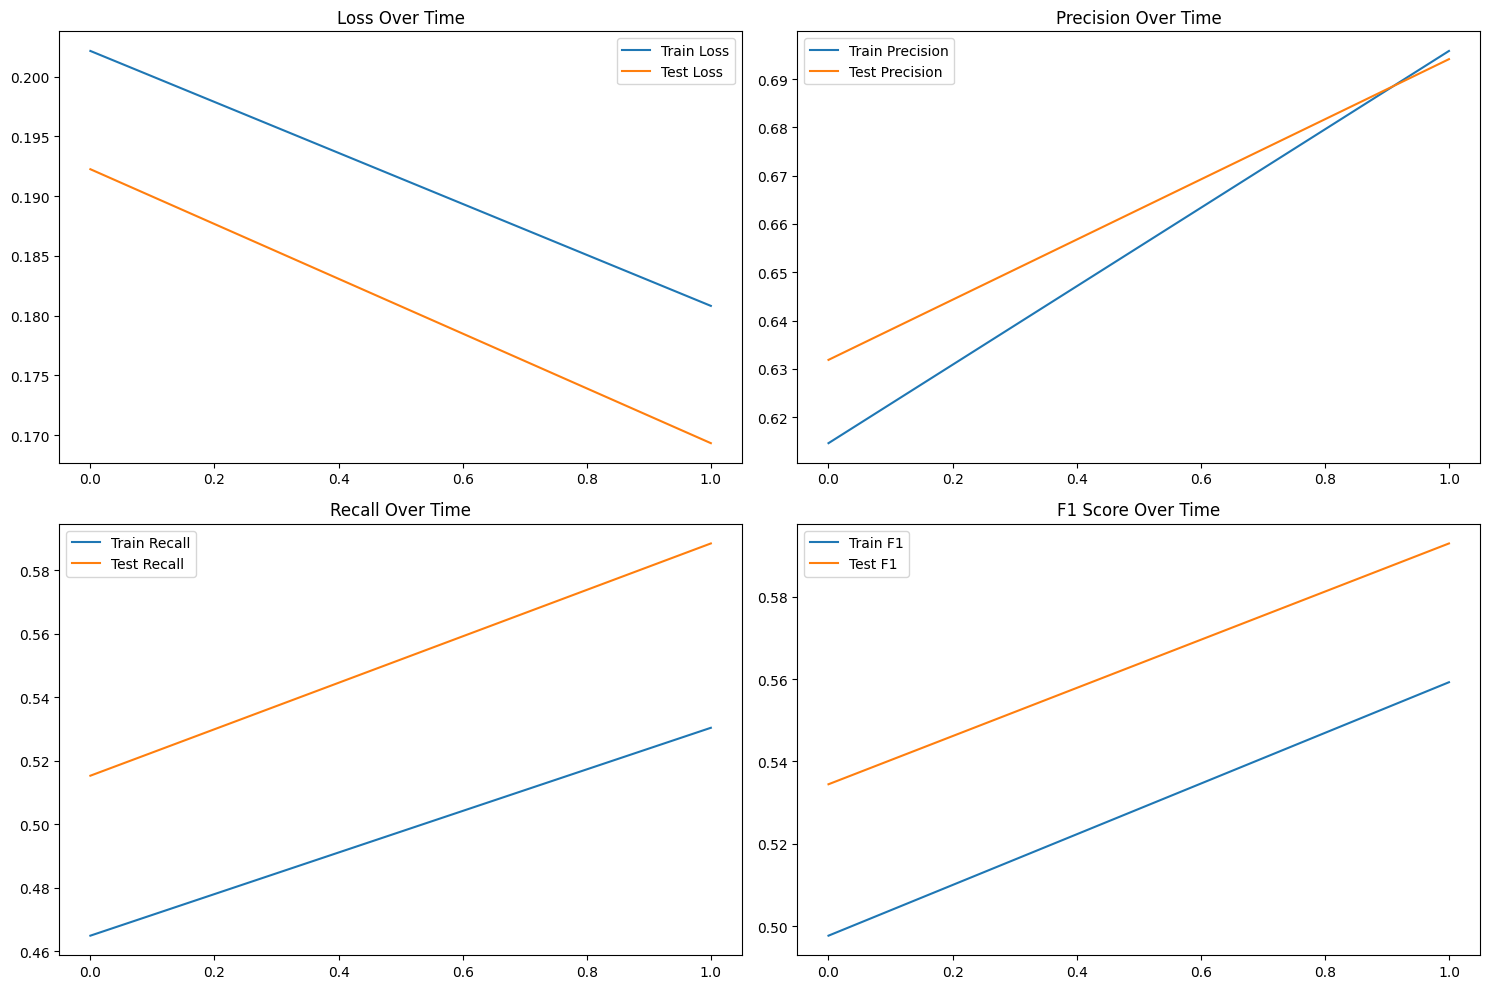

In [84]:
plot_training_history(history_18)

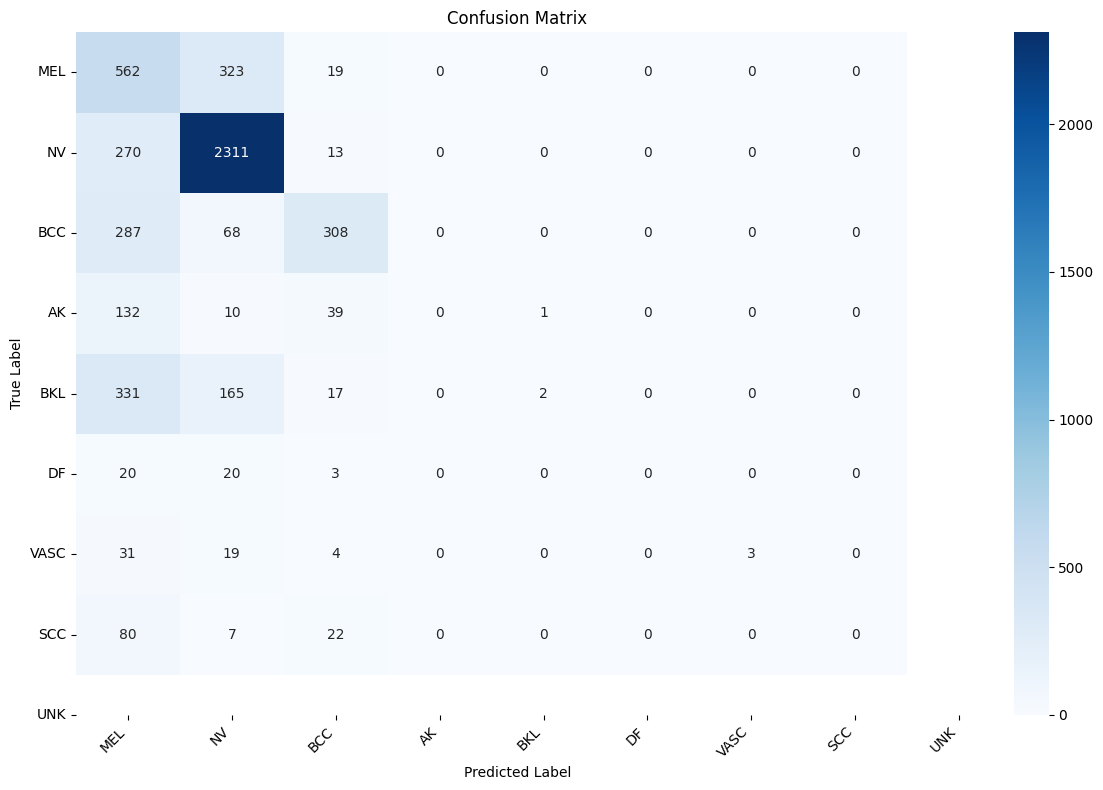

In [85]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    
    plt.figure(figsize=(12, 8))
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

class_names = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']

y_test_arr_18 = np.array(y_true_18)
y_pred_arr_18 = np.array(y_pred_18)

plot_confusion_matrix(y_test_arr_18, y_pred_arr_18, class_names)


In [87]:
def plot_metrics(y_true, y_pred, class_names):
   
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    
    accuracy = accuracy_score(y_true_labels, y_pred_labels)
    
    precision, recall, f1, support = precision_recall_fscore_support(y_true_labels, y_pred_labels)

    print("\nClassification Metrics:")
    print("=====================")
    print(f"Overall Accuracy: {accuracy:.3f}")
    print("\nPer-class Metrics:")
    print("------------------")
    
    for i, class_name in enumerate(class_names):
        if class_name == "UNK":
            continue
        print(f"\nClass: {class_name}")
        print(f"Precision: {precision[i]:.3f}")
        print(f"Recall: {recall[i]:.3f}")
        print(f"F1-score: {f1[i]:.3f}")
        print(f"Support: {support[i]}")
        
    weighted_precision = np.average(precision, weights=support)
    weighted_recall = np.average(recall, weights=support)
    weighted_f1 = np.average(f1, weights=support)
    
    print("\nWeighted Averages:")
    print("-----------------")
    print(f"Weighted Precision: {weighted_precision:.3f}")
    print(f"Weighted Recall: {weighted_recall:.3f}")
    print(f"Weighted F1-score: {weighted_f1:.3f}")
    
    class_distribution = np.sum(cm, axis=1)
    total_samples = np.sum(class_distribution)
    
    print("\nClass Distribution:")
    print("------------------")
    for i, class_name in enumerate(class_names):
        if class_name == "UNK":
            continue
        percentage = (class_distribution[i] / total_samples) * 100
        print(f"{class_name}: {class_distribution[i]} samples ({percentage:.1f}%)")


plot_metrics(y_test_arr_18, y_pred_arr_18, class_names)


Classification Metrics:
Overall Accuracy: 0.629

Per-class Metrics:
------------------

Class: MEL
Precision: 0.328
Recall: 0.622
F1-score: 0.429
Support: 904

Class: NV
Precision: 0.791
Recall: 0.891
F1-score: 0.838
Support: 2594

Class: BCC
Precision: 0.725
Recall: 0.465
F1-score: 0.566
Support: 663

Class: AK
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 182

Class: BKL
Precision: 0.667
Recall: 0.004
F1-score: 0.008
Support: 515

Class: DF
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 43

Class: VASC
Precision: 1.000
Recall: 0.053
F1-score: 0.100
Support: 57

Class: SCC
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 109

Weighted Averages:
-----------------
Weighted Precision: 0.637
Weighted Recall: 0.629
Weighted F1-score: 0.582

Class Distribution:
------------------
MEL: 904 samples (17.8%)
NV: 2594 samples (51.2%)
BCC: 663 samples (13.1%)
AK: 182 samples (3.6%)
BKL: 515 samples (10.2%)
DF: 43 samples (0.8%)
VASC: 57 samples (1.1%)
SCC: 109 samples (

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Resnet34

In [88]:
# Create model
model_34 = ISICResNet('resnet34', pretrained=True)
model_34 = model_34.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model_34

In [90]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_34.parameters(), lr=0.001)

# Train model
model_34, history_34, y_true_34, y_pred_34 = train_model(
    model_34, 
    train_loader, 
    test_loader, 
    criterion, 
    optimizer, 
    device,
    num_epochs=2
)

Train Epoch 1/2: 100%|██████████| 634/634 [06:34<00:00,  1.61batch/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Test Epoch 1/2: 100%|██████████| 159/159 [01:21<00:00,  1.95batch/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavi

In [92]:
torch.save(model_34.state_dict(), 'isic_model_resnet34.pth')

In [93]:
history_34["test_f1"][1], history_34["test_recall"][1], history_34["test_precision"][1]

(0.5217201481228418, 0.5166765344385238, 0.6216112054079008)

In [ ]:
plot_training_history(history_34)

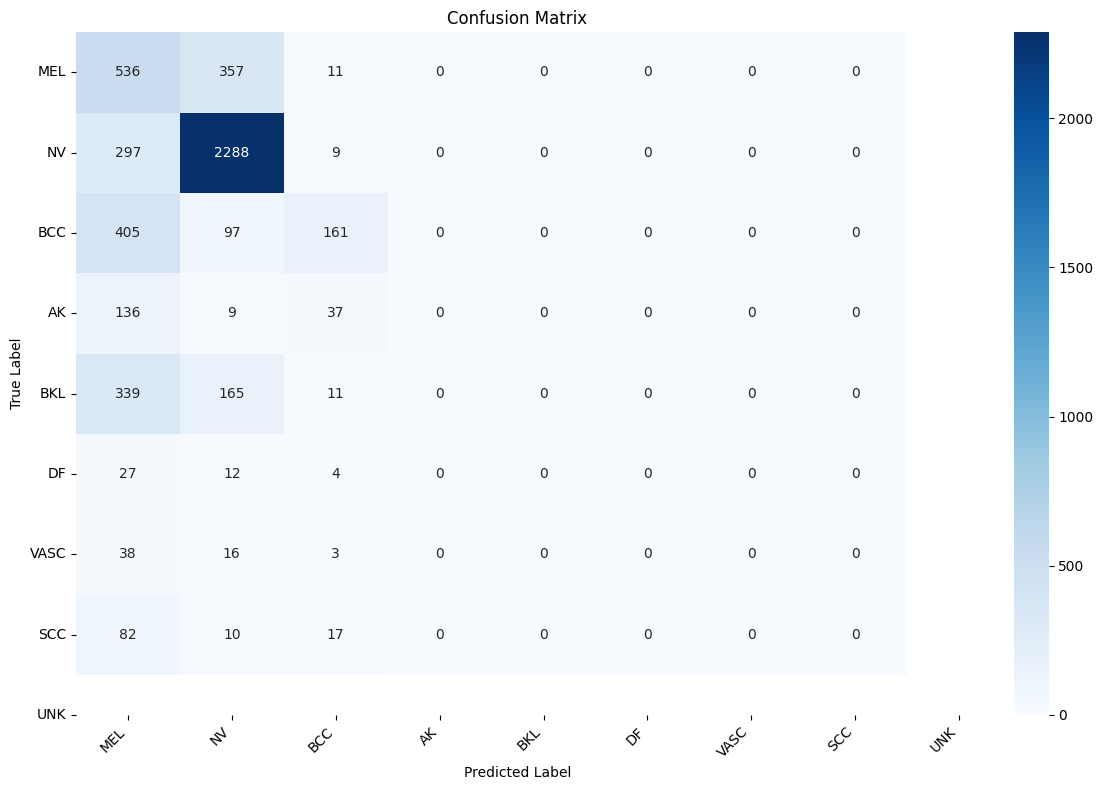

In [94]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    
    plt.figure(figsize=(12, 8))
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

class_names = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']

y_test_arr_34 = np.array(y_true_34)
y_pred_arr_34 = np.array(y_pred_34)

plot_confusion_matrix(y_test_arr_34, y_pred_arr_34, class_names)


In [95]:
def plot_metrics(y_true, y_pred, class_names):
   
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    
    accuracy = accuracy_score(y_true_labels, y_pred_labels)
    
    precision, recall, f1, support = precision_recall_fscore_support(y_true_labels, y_pred_labels)

    print("\nClassification Metrics:")
    print("=====================")
    print(f"Overall Accuracy: {accuracy:.3f}")
    print("\nPer-class Metrics:")
    print("------------------")
    
    for i, class_name in enumerate(class_names):
        if class_name == "UNK":
            continue
        print(f"\nClass: {class_name}")
        print(f"Precision: {precision[i]:.3f}")
        print(f"Recall: {recall[i]:.3f}")
        print(f"F1-score: {f1[i]:.3f}")
        print(f"Support: {support[i]}")
        
    weighted_precision = np.average(precision, weights=support)
    weighted_recall = np.average(recall, weights=support)
    weighted_f1 = np.average(f1, weights=support)
    
    print("\nWeighted Averages:")
    print("-----------------")
    print(f"Weighted Precision: {weighted_precision:.3f}")
    print(f"Weighted Recall: {weighted_recall:.3f}")
    print(f"Weighted F1-score: {weighted_f1:.3f}")
    
    class_distribution = np.sum(cm, axis=1)
    total_samples = np.sum(class_distribution)
    
    print("\nClass Distribution:")
    print("------------------")
    for i, class_name in enumerate(class_names):
        if class_name == "UNK":
            continue
        percentage = (class_distribution[i] / total_samples) * 100
        print(f"{class_name}: {class_distribution[i]} samples ({percentage:.1f}%)")


plot_metrics(y_test_arr_34, y_pred_arr_34, class_names)


Classification Metrics:
Overall Accuracy: 0.589

Per-class Metrics:
------------------

Class: MEL
Precision: 0.288
Recall: 0.593
F1-score: 0.388
Support: 904

Class: NV
Precision: 0.775
Recall: 0.882
F1-score: 0.825
Support: 2594

Class: BCC
Precision: 0.636
Recall: 0.243
F1-score: 0.352
Support: 663

Class: AK
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 182

Class: BKL
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 515

Class: DF
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 43

Class: VASC
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 57

Class: SCC
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 109

Weighted Averages:
-----------------
Weighted Precision: 0.531
Weighted Recall: 0.589
Weighted F1-score: 0.537

Class Distribution:
------------------
MEL: 904 samples (17.8%)
NV: 2594 samples (51.2%)
BCC: 663 samples (13.1%)
AK: 182 samples (3.6%)
BKL: 515 samples (10.2%)
DF: 43 samples (0.8%)
VASC: 57 samples (1.1%)
SCC: 109 samples (

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Resnet50

In [96]:
# Create model
model_50 = ISICResNet('resnet50', pretrained=True)
model_50 = model_50.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 220MB/s]


In [97]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_50.parameters(), lr=0.001)

# Train model
model_50, history_50, y_true_50, y_pred_50 = train_model(
    model_50, 
    train_loader, 
    test_loader, 
    criterion, 
    optimizer, 
    device,
    num_epochs=2
)

Train Epoch 1/2: 100%|██████████| 634/634 [08:19<00:00,  1.27batch/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Test Epoch 1/2: 100%|██████████| 159/159 [01:26<00:00,  1.84batch/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavi

In [100]:
history_50["test_f1"][1], history_50["test_recall"][1], history_50["test_precision"][1]

(0.47967836433467764, 0.5259522399842116, 0.5526387085938285)

In [102]:
torch.save(model_50.state_dict(), 'isic_model_resnet50.pth')

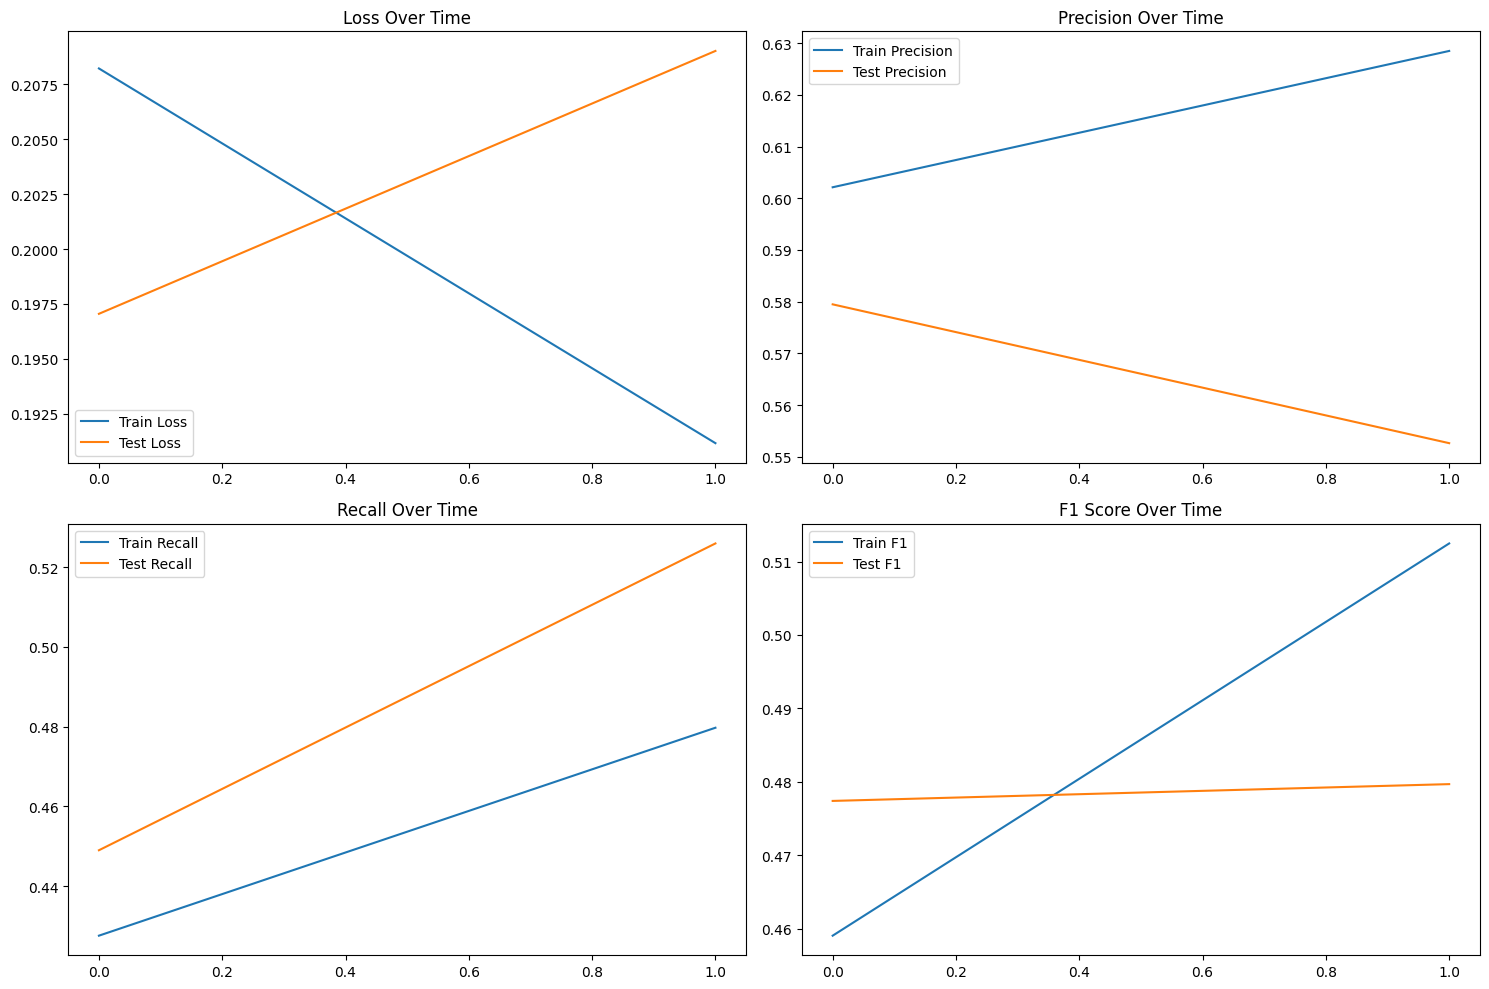

In [103]:
plot_training_history(history_50)

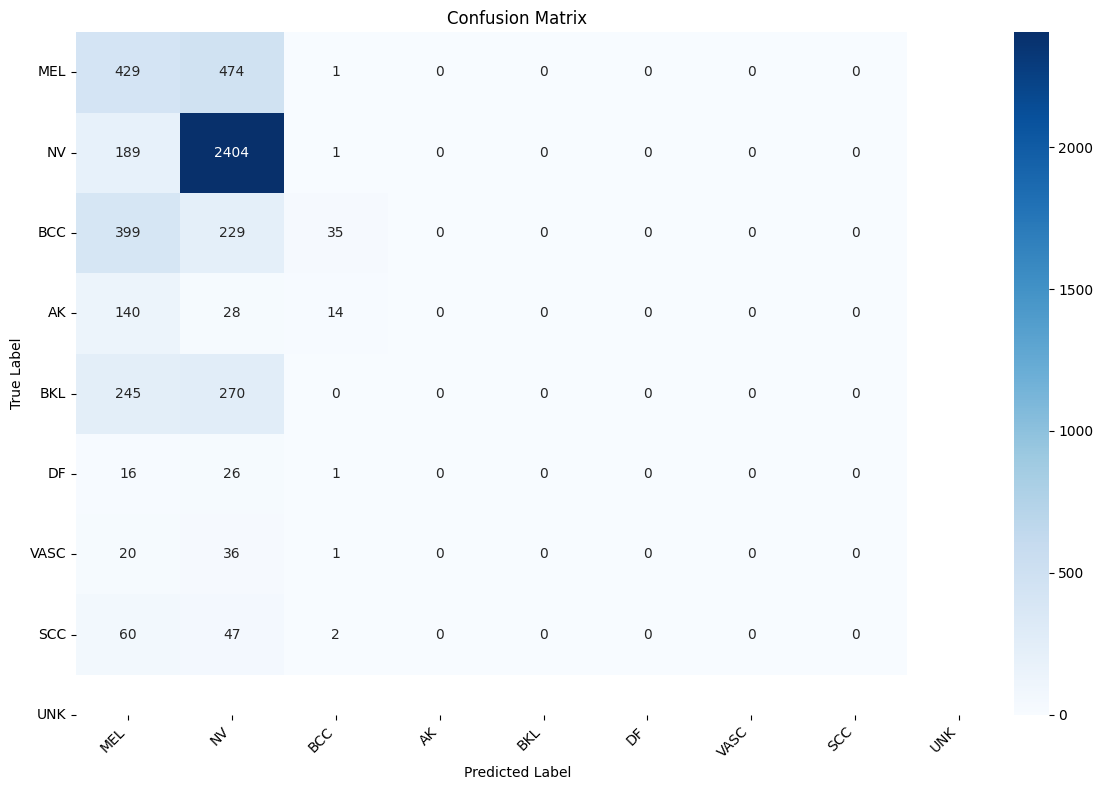

In [105]:
y_test_arr_50 = np.array(y_true_50)
y_pred_arr_50 = np.array(y_pred_50)

plot_confusion_matrix(y_test_arr_50, y_pred_arr_50, class_names)

In [107]:
plot_metrics(y_test_arr_50, y_pred_arr_50, class_names)


Classification Metrics:
Overall Accuracy: 0.566

Per-class Metrics:
------------------

Class: MEL
Precision: 0.286
Recall: 0.475
F1-score: 0.357
Support: 904

Class: NV
Precision: 0.684
Recall: 0.927
F1-score: 0.787
Support: 2594

Class: BCC
Precision: 0.636
Recall: 0.053
F1-score: 0.097
Support: 663

Class: AK
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 182

Class: BKL
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 515

Class: DF
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 43

Class: VASC
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 57

Class: SCC
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 109

Weighted Averages:
-----------------
Weighted Precision: 0.485
Weighted Recall: 0.566
Weighted F1-score: 0.479

Class Distribution:
------------------
MEL: 904 samples (17.8%)
NV: 2594 samples (51.2%)
BCC: 663 samples (13.1%)
AK: 182 samples (3.6%)
BKL: 515 samples (10.2%)
DF: 43 samples (0.8%)
VASC: 57 samples (1.1%)
SCC: 109 samples (

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparison between ResNet18, ResNet34 and ResNet50

1. **Overall Accuracy:**

* ResNet18: 62.9%
* ResNet34: 58.9%
* ResNet50: 56.6%

-- Surprisingly, ResNet18 performs best, showing that deeper architecture doesn't necessarily mean better performance in this case.

2. **Performance**
* ResNet18: Failed on 3 classes (AK, DF, SCC)
* ResNet34: Failed on 5 classes (AK, BKL, DF, VASC, SCC)
* ResNet50: Failed on 5 classes (AK, BKL, DF, VASC, SCC)

3. **ResNet18** consistently outperforms deeper architectures. Suggests possible overfitting with deeper networks

4. Class Imbalance Impact:

* All models perform best on **NV (majority class)**
* Struggle with minority classes
* Deeper networks particularly struggle with rare classes



In deep neural networks, this challenge becomes even more pronounced because of how these networks learn. Each layer in the network learns increasingly complex features, building upon what previous layers have learned. Let's understand why this creates specific challenges for rare classes:

The Feature Learning Problem:
In early layers, the network learns basic features like edges and colors. In middle layers, it combines these into more complex patterns like textures and simple shapes. The deepest layers learn highly specific features for different classes. For rare classes, the network doesn't get enough examples to learn these discriminative features effectively.

## Finetuning

Low-Level Features: The early layers have learned to detect basic elements like edges, colors, and textures. These are universal features useful for almost any visual task
Fine-tuned models typically need less regularization because they're already "regularized" by their original training. The pre-trained weights represent meaningful features, so they're less likely to overfit to noise in the new dataset.

In [17]:
import torch.nn as nn
from torchvision import models
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau


In [ ]:
class ResNet50_Finetune(nn.Module):
    def __init__(self, num_classes=9):
        super(ResNet50_Finetune, self).__init__()
        self.model = models.resnet50(pretrained=True)
        for param in list(self.model.parameters())[:-20]:  # Keep last few layers trainable (as they are more task specific) and freeze the other layers
            param.requires_grad = False
            
        num_ftrs = self.model.fc.in_features
        
        # Replace the final fully connected layer with our own custom layers
        self.model.fc = nn.Sequential(
            nn.Linear(num_ftrs, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes), # we want the final layer to have the number of classes equal to our required classes
            nn.Sigmoid()  # For multi-label classification
        )
    
    def forward(self, x):
        return self.model(x)

In [ ]:
def setup_training(num_classes=9, lr=0.001):
    # Initialize model
    model = ResNet50_Finetune(num_classes=num_classes)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    # Loss function
    criterion = nn.BCELoss()
    
    # Optimizer with different learning rates for different layers
    params_to_update = []
    params_names = []
    
    for name, param in model.named_parameters():
        if param.requires_grad:
            params_to_update.append(param)
            params_names.append(name)
            
    optimizer = Adam([
        {'params': model.model.fc.parameters(), 'lr': lr},  # New layers - only training these last few layers parameters again
        {'params': list(set(params_to_update) - set(model.model.fc.parameters())), 
         'lr': lr/10}  # Fine-tuned layers
    ])
    
    # Learning rate scheduler
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
    
    return model, criterion, optimizer, scheduler, device

In [20]:
from torch.utils.tensorboard import SummaryWriter
from tensorflow.keras.callbacks import TensorBoard
import datetime

In [43]:
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=25):
    current_time = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    log_dir = f'./logs/fit/{current_time}'  # Change this to a local directory
    writer = SummaryWriter(log_dir)
    
    metrics_history = {
        'train_loss': [], 'val_loss': [],
        'train_accuracy': [], 'val_accuracy': [],
        'train_precision': [], 'val_precision': [],
        'train_recall': [], 'val_recall': [],
        'train_f1': [], 'val_f1': []
    }
    
    best_val_loss = float('inf')
    best_model = None
    
    # Log model graph
    dummy_input = next(iter(train_loader))[0][:1].to(device)
    writer.add_graph(model, dummy_input)
    
    for epoch in (range(num_epochs)):
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader
            
            running_loss = 0.0
            all_labels = []
            all_preds = []
            all_outputs = []  # Store raw outputs for distribution analysis
            
            for batch_idx, (inputs, labels) in enumerate(tqdm(dataloader, desc=f'{phase.capitalize()} Epoch {epoch + 1}/{num_epochs}', unit='batch')):                
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        
                        # Log batch loss
                        global_step = epoch * len(dataloader) + batch_idx
                        writer.add_scalar(f'{phase}/batch_loss', loss.item(), global_step)
                        
                        # Log gradients histogram
                        for name, param in model.named_parameters():
                            if param.requires_grad and param.grad is not None:
                                writer.add_histogram(f'gradients/{name}', 
                                                  param.grad, 
                                                  global_step)
                
                running_loss += loss.item() * inputs.size(0)
                preds = (outputs > 0.5).float()
                
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(preds.cpu().numpy())
                all_outputs.extend(outputs.detach().cpu().numpy())
            
            # Calculate metrics
            all_labels = np.array(all_labels)
            all_preds = np.array(all_preds)
            all_outputs = np.array(all_outputs)
            
            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = np.mean(np.all(all_labels == all_preds, axis=1))
            
            precision, recall, f1, _ = precision_recall_fscore_support(
                all_labels, all_preds, average='weighted', zero_division=0
            )
            
            # Store metrics
            metrics_history[f'{phase}_loss'].append(epoch_loss)
            metrics_history[f'{phase}_accuracy'].append(epoch_acc)
            metrics_history[f'{phase}_precision'].append(precision)
            metrics_history[f'{phase}_recall'].append(recall)
            metrics_history[f'{phase}_f1'].append(f1)
            
            # Log metrics to tensorboard
            writer.add_scalar(f'{phase}/loss', epoch_loss, epoch)
            writer.add_scalar(f'{phase}/accuracy', epoch_acc, epoch)
            writer.add_scalar(f'{phase}/precision', precision, epoch)
            writer.add_scalar(f'{phase}/recall', recall, epoch)
            writer.add_scalar(f'{phase}/f1', f1, epoch)
            
            # Log histograms
            # Model parameters
            for name, param in model.named_parameters():
                writer.add_histogram(f'parameters/{name}', param, epoch)
            
            # Predictions distribution
            writer.add_histogram(f'{phase}/predictions', all_preds, epoch)
            writer.add_histogram(f'{phase}/raw_outputs', all_outputs, epoch)
            
            # Log confusion matrix
            if phase == 'val':
                # Calculate confusion matrix for each class
                for i in range(all_labels.shape[1]):
                    cm = confusion_matrix(all_labels[:, i], all_preds[:, i])
                    fig = plt.figure(figsize=(8, 8))
                    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
                    plt.title(f'Confusion Matrix - Class {i}')
                    plt.xlabel('Predicted')
                    plt.ylabel('True')
                    writer.add_figure(f'confusion_matrix/class_{i}', fig, epoch)
                    plt.close()
            
            # Print metrics
            print(f'\n{phase.capitalize()} Epoch {epoch+1}/{num_epochs}')
            print(f'Loss: {epoch_loss:.4f}')
            print(f'Accuracy: {epoch_acc:.4f}')
            print(f'Precision: {precision:.4f}')
            print(f'Recall: {recall:.4f}')
            print(f'F1-score: {f1:.4f}')
            
            # GPU Usage if available
            if torch.cuda.is_available():
                writer.add_scalar('gpu/memory_allocated', 
                                torch.cuda.memory_allocated(0)/1024**2,
                                epoch)
                writer.add_scalar('gpu/memory_cached',
                                torch.cuda.memory_cached(0)/1024**2,
                                epoch)
            
            # Update scheduler and save best model
            if phase == 'val':
                scheduler.step(epoch_loss)
                if epoch_loss < best_val_loss:
                    best_val_loss = epoch_loss
                    best_model = model.state_dict()
                    torch.save({
                        'epoch': epoch,
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'loss': best_val_loss,
                        'metrics': metrics_history
                    }, f'C:/Users/Rishita/Desktop/DA312/best_model_{current_time}.pth')
    
    writer.close()
    model.load_state_dict(best_model)
    return model, metrics_history, all_labels, all_preds

# Usage example:
"""
# Train model
model_50_finetune, history = train_model(
    model_50_finetune, train_loader, test_loader,
    criterion, optimizer, scheduler,
    device, num_epochs=25
)

# Plot detailed metrics
plot_detailed_metrics(history)

# View tensorboard
%load_ext tensorboard
%tensorboard --logdir /kaggle/working/logs/fit
"""

'\n# Train model\nmodel_50_finetune, history = train_model(\n    model_50_finetune, train_loader, test_loader,\n    criterion, optimizer, scheduler,\n    device, num_epochs=25\n)\n\n# Plot detailed metrics\nplot_detailed_metrics(history)\n\n# View tensorboard\n%load_ext tensorboard\n%tensorboard --logdir /kaggle/working/logs/fit\n'

In [51]:
def plot_detailed_metrics(history):
    """Plot detailed training metrics including distributions"""
    metrics = ['loss', 'accuracy', 'precision', 'recall', 'f1']
    fig = plt.figure(figsize=(20, 15))
    
    # Metrics over time
    for idx, metric in enumerate(metrics):
        plt.subplot(3, 2, idx+1)
        plt.plot(history[f'train_{metric}'], label=f'Train {metric}')
        plt.plot(history[f'val_{metric}'], label=f'Val {metric}')
        plt.title(f'Model {metric}')
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.legend()
    
    plt.tight_layout()
    plt.savefig(r'C:\Users\Rishita\Desktop\DA312\training_metrics.png')
    plt.show()

In [23]:
import torch.optim as optim

In [26]:
model_50_finetune, criterion, optimizer, scheduler, device = setup_training(num_classes=9, lr=0.001)

c:\Users\Rishita\Desktop\DA312\myenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Rishita\Desktop\DA312\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Rishita/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100.0%
c:\Users\Rishita\Desktop\DA312\myenv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  war

In [44]:
# Then train
model_50_finetune, history, y_test, y_pred = train_model(
    model_50_finetune, train_loader, test_loader,
    criterion, optimizer, scheduler,
    device, num_epochs=2
)

Train Epoch 1/2: 100%|██████████| 634/634 [22:32<00:00,  2.13s/batch]
C:\Users\Rishita\AppData\Local\Temp\ipykernel_37140\2591374129.py:129: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  torch.cuda.memory_cached(0)/1024**2,



Train Epoch 1/2
Loss: 0.1532
Accuracy: 0.6193
Precision: 0.7470
Recall: 0.6234
F1-score: 0.6601


Val Epoch 1/2: 100%|██████████| 159/159 [03:53<00:00,  1.47s/batch]
c:\Users\Rishita\Desktop\DA312\myenv\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\Rishita\AppData\Local\Temp\ipykernel_37140\2591374129.py:129: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  torch.cuda.memory_cached(0)/1024**2,



Val Epoch 1/2
Loss: 0.1429
Accuracy: 0.6546
Precision: 0.7868
Recall: 0.6615
F1-score: 0.6958


Train Epoch 2/2: 100%|██████████| 634/634 [23:15<00:00,  2.20s/batch]
C:\Users\Rishita\AppData\Local\Temp\ipykernel_37140\2591374129.py:129: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  torch.cuda.memory_cached(0)/1024**2,



Train Epoch 2/2
Loss: 0.1422
Accuracy: 0.6570
Precision: 0.7725
Recall: 0.6614
F1-score: 0.6938


Val Epoch 2/2: 100%|██████████| 159/159 [03:09<00:00,  1.19s/batch]
c:\Users\Rishita\Desktop\DA312\myenv\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\Rishita\AppData\Local\Temp\ipykernel_37140\2591374129.py:129: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  torch.cuda.memory_cached(0)/1024**2,



Val Epoch 2/2
Loss: 0.1294
Accuracy: 0.6807
Precision: 0.8167
Recall: 0.6809
F1-score: 0.7229


### Finetuned model performance

1. The fine-tuned model shows significant improvement, being ~5% better than ResNet18 and ~9% better than ResNet34
2. Fine-tuned model shows major improvement in precision, ~18% better than ResNet18 and ~28% better than ResNet34 and ~30% better than ResNet50
3. The fine-tuning process has effectively improved the model's ability to make accurate predictions
4. The balanced improvement across metrics suggests better overall generalization

- Deeper architecture (ResNet50) when properly fine-tuned can outperform simpler architectures


## Tensorboard

In [52]:
# Save all figures
import os

def save_all_visualizations(history, save_dir=r'C:\Users\Rishita\Desktop\DA312\visualizations'):
    os.makedirs(save_dir, exist_ok=True)
    
    # Save training metrics
    plot_detailed_metrics(history)
    print(save_dir)
    plt.savefig(os.path.join(save_dir, 'training_metrics.png'))
    
    # Save confusion matrices
    for i in range(8):  # assuming 8 classes
        plt.figure(figsize=(8, 8))
        # Create and save confusion matrix for each class
        plt.savefig(os.path.join(save_dir, f'confusion_matrix_class_{i}.png'))
        plt.close()
    
    # Save distribution plots
    plt.figure(figsize=(12, 6))
    # Create and save distribution plots
    plt.savefig(os.path.join(save_dir, 'distributions.png'))
    plt.close()

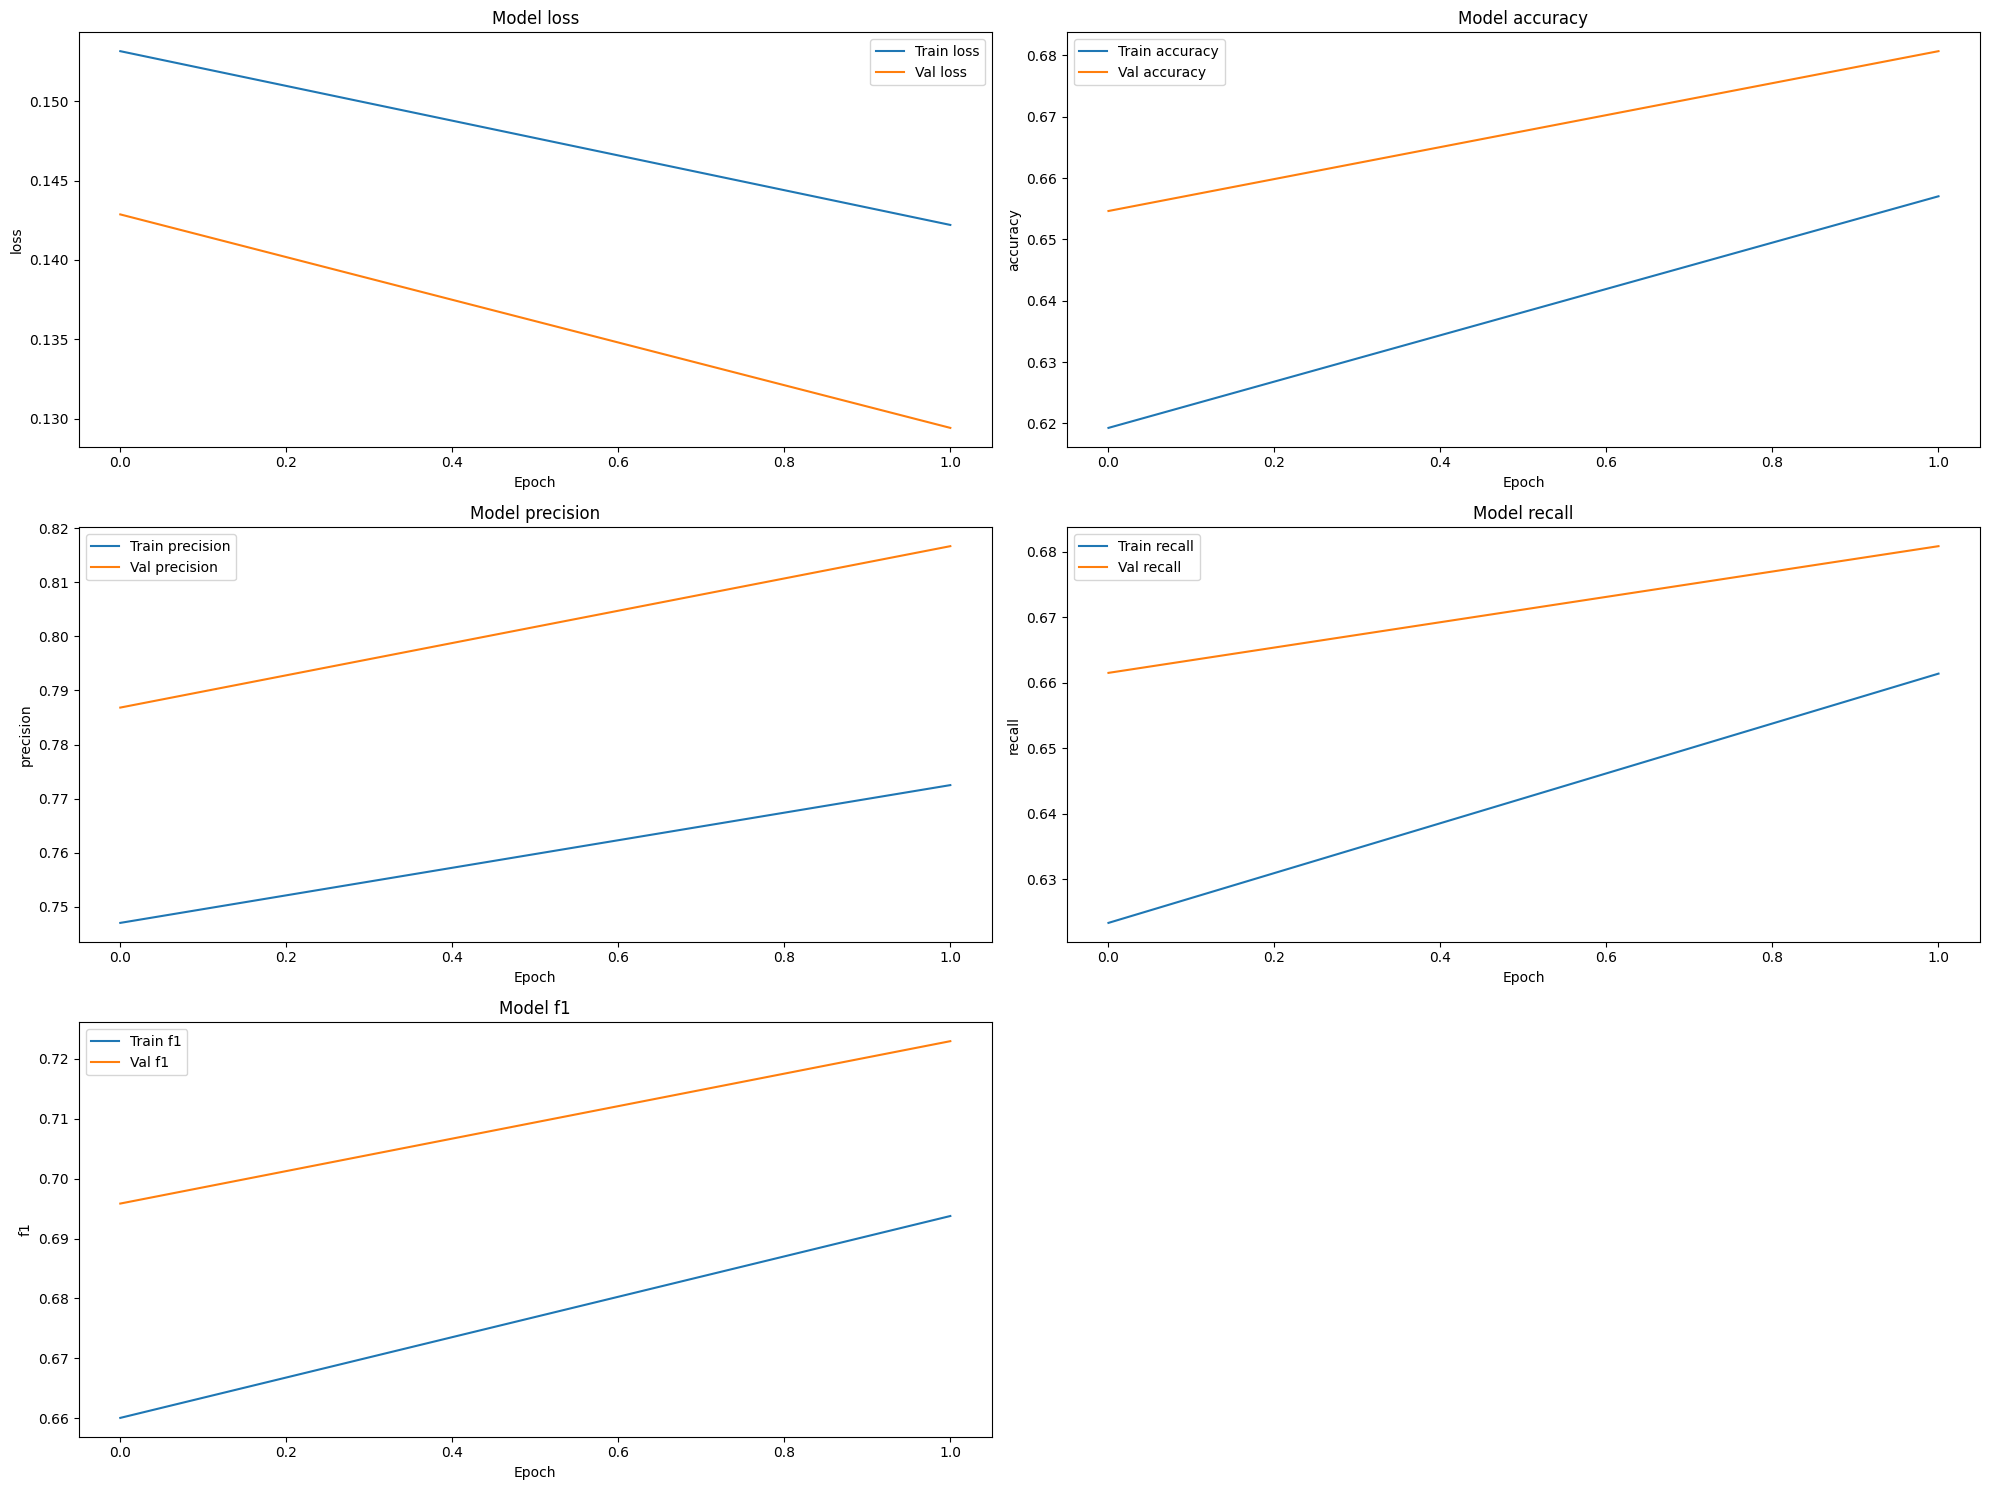

C:\Users\Rishita\Desktop\DA312\visualizations


<Figure size 640x480 with 0 Axes>

In [53]:
save_all_visualizations(history)

In [54]:
# Load extension
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [1]:
%tensorboard --logdir ./logs/fit --port 6005

UsageError: Line magic function `%tensorboard` not found.


## Tensorboard Visualization

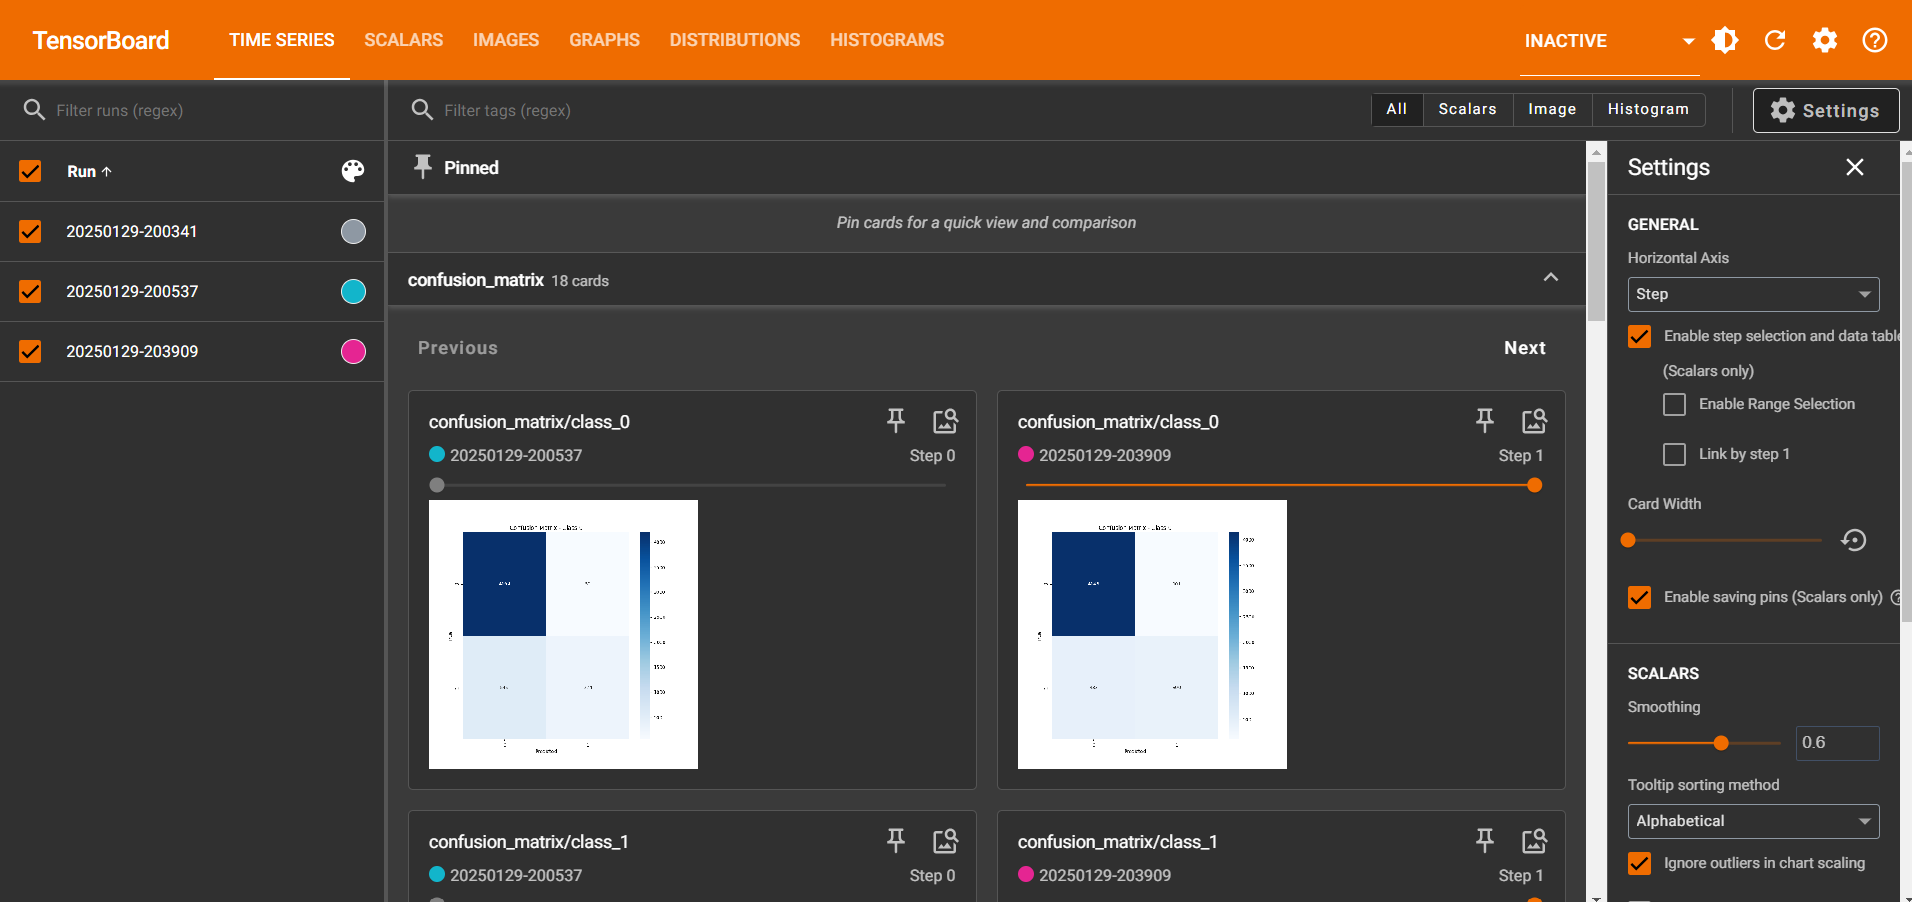

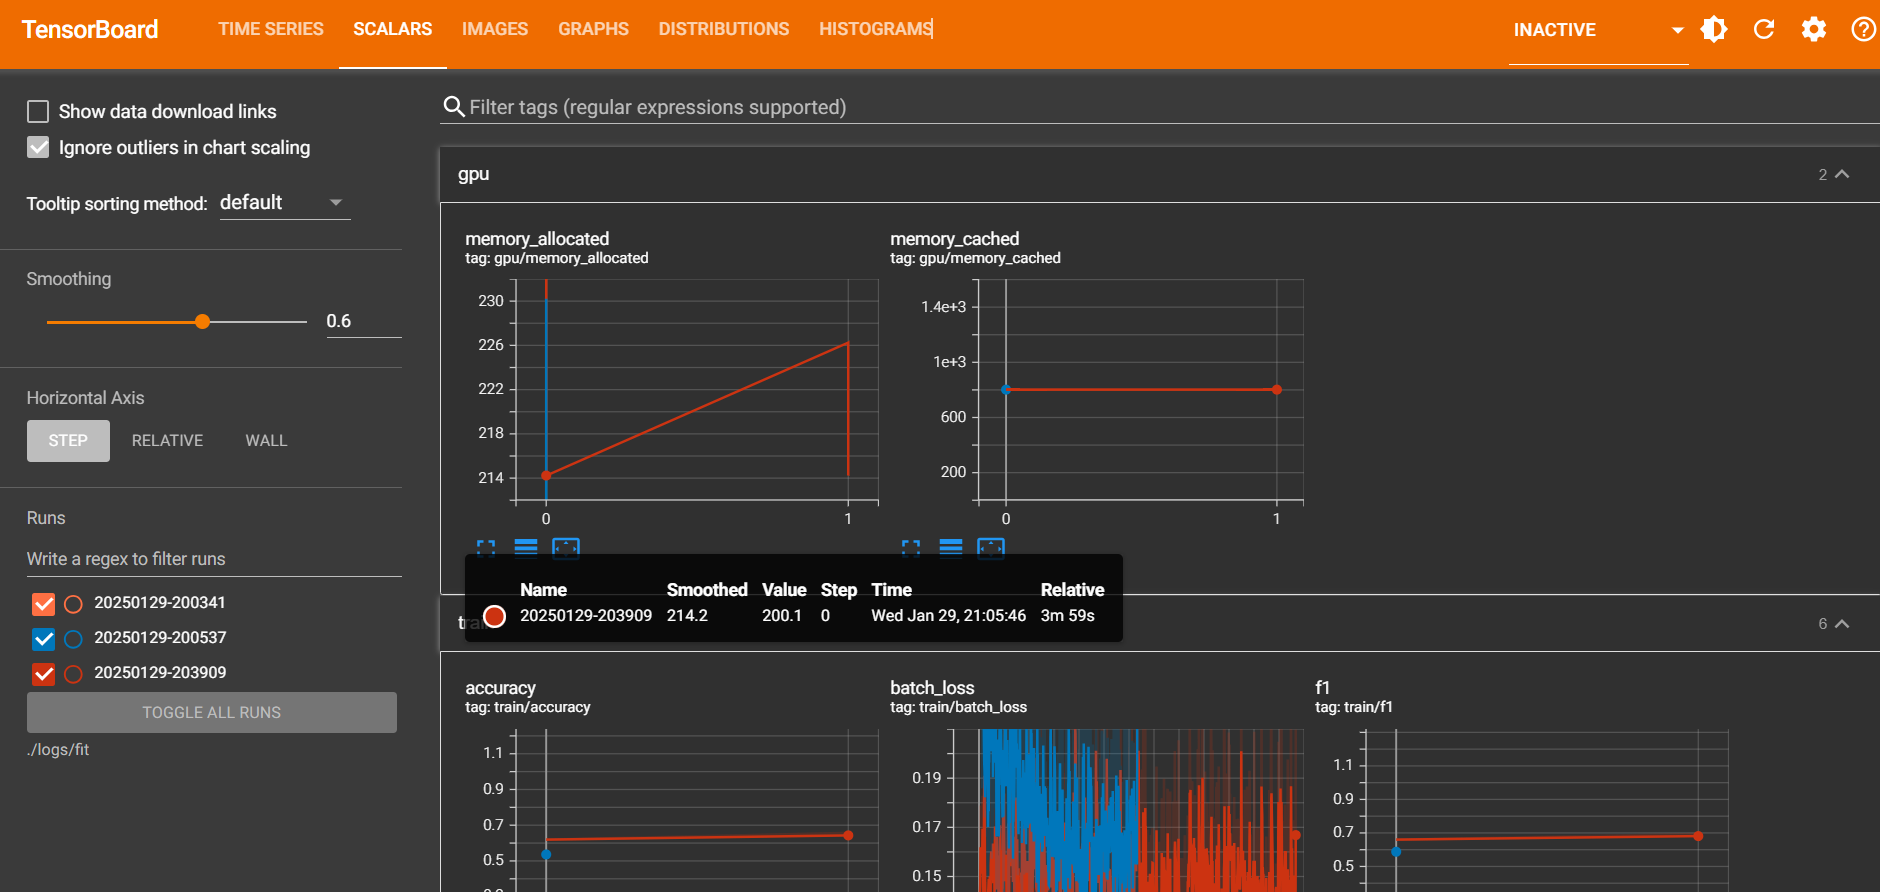

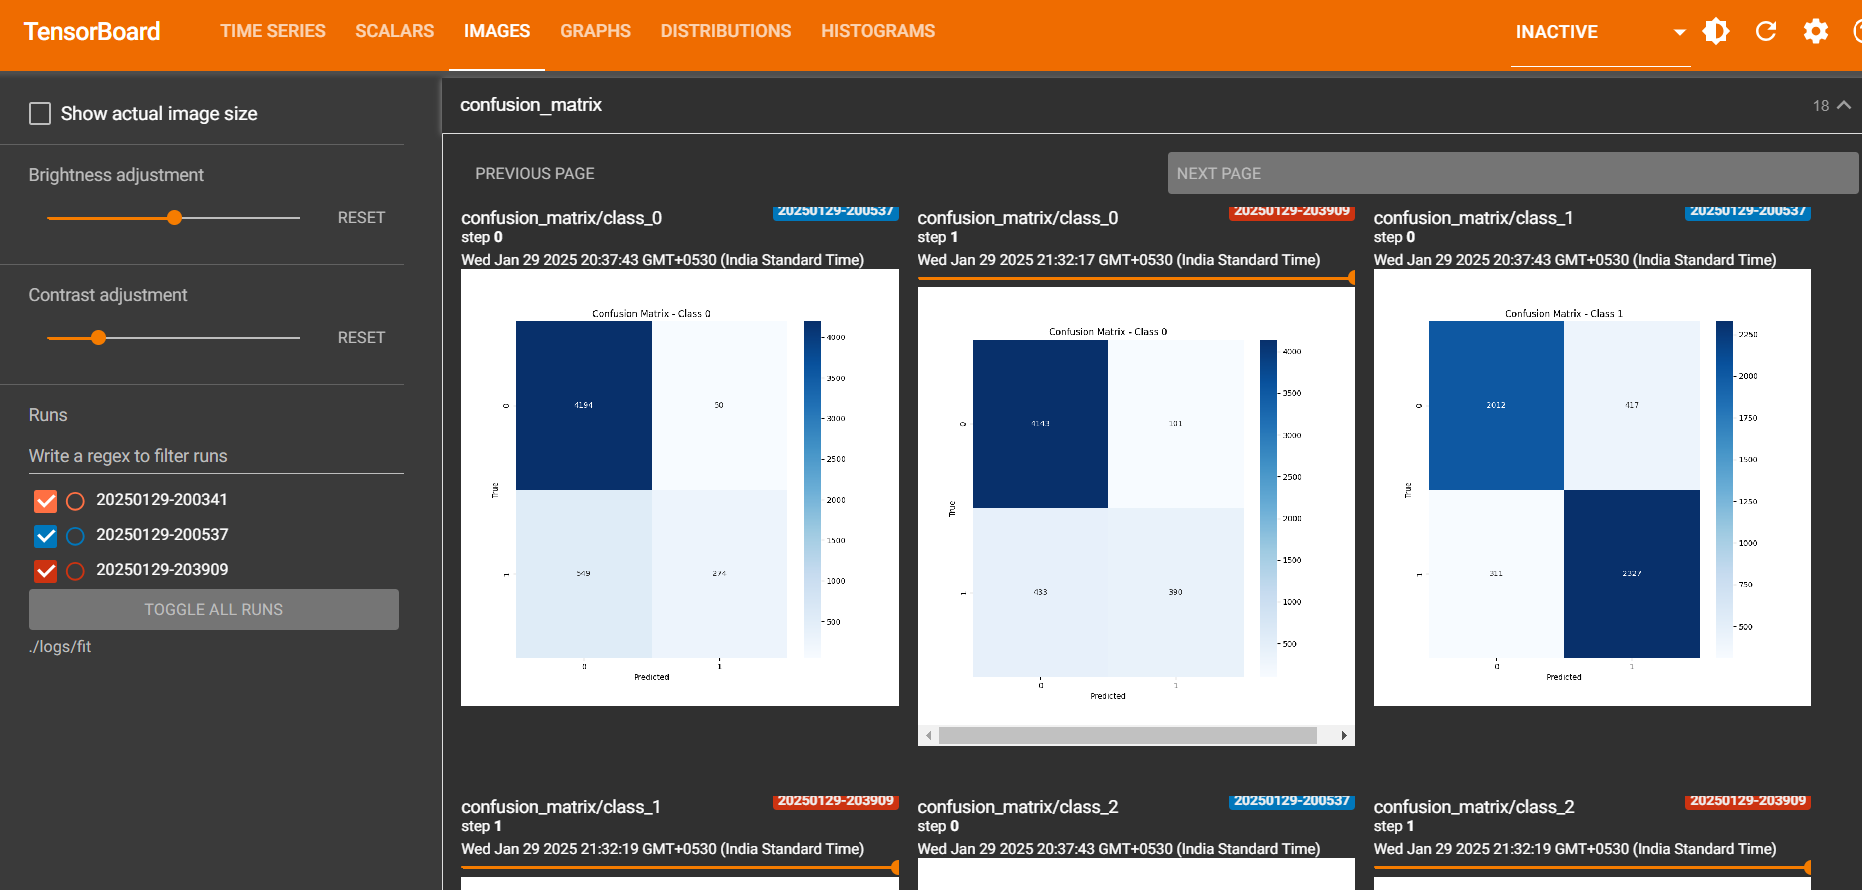

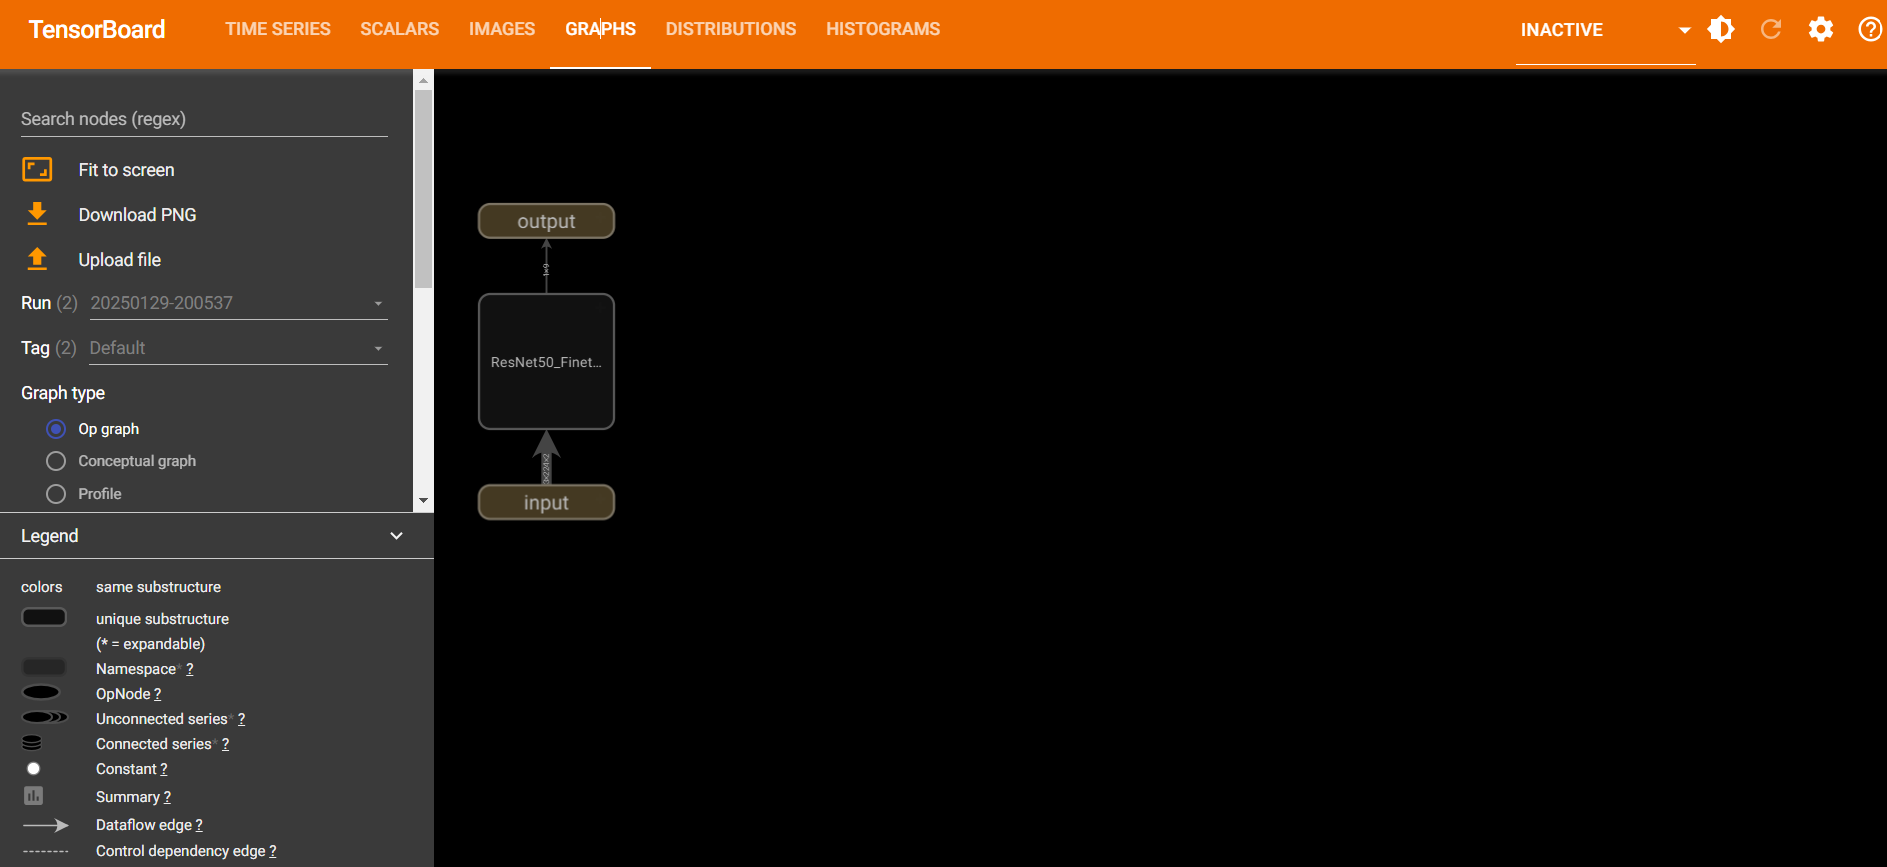

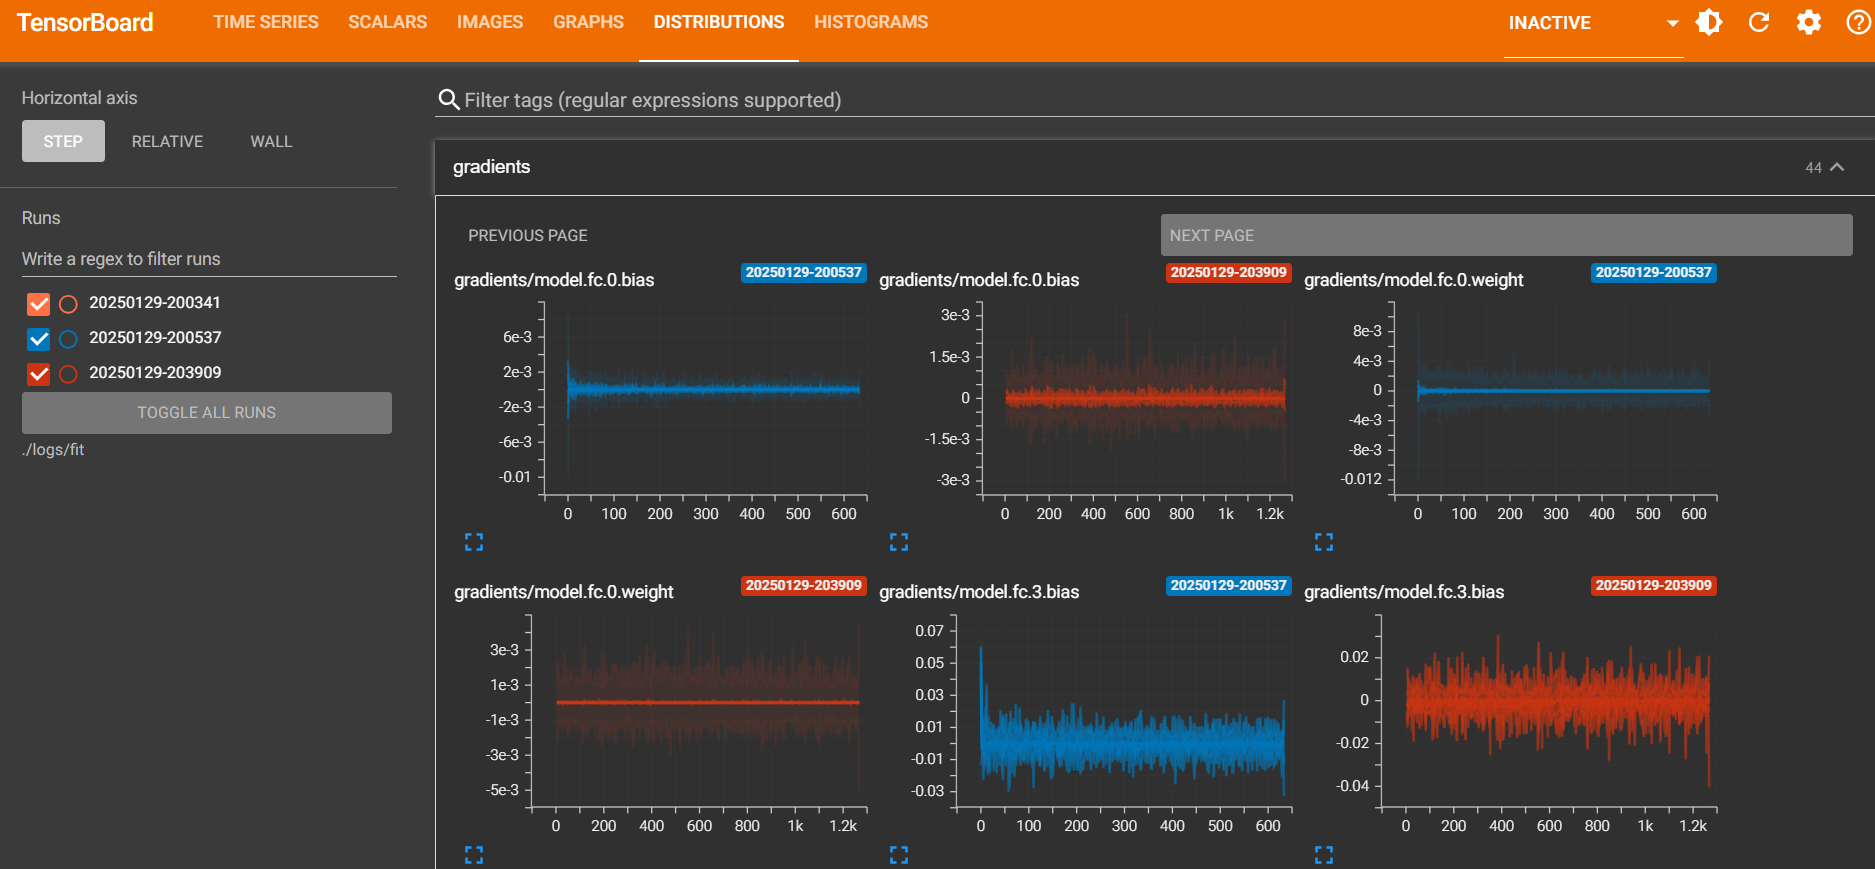

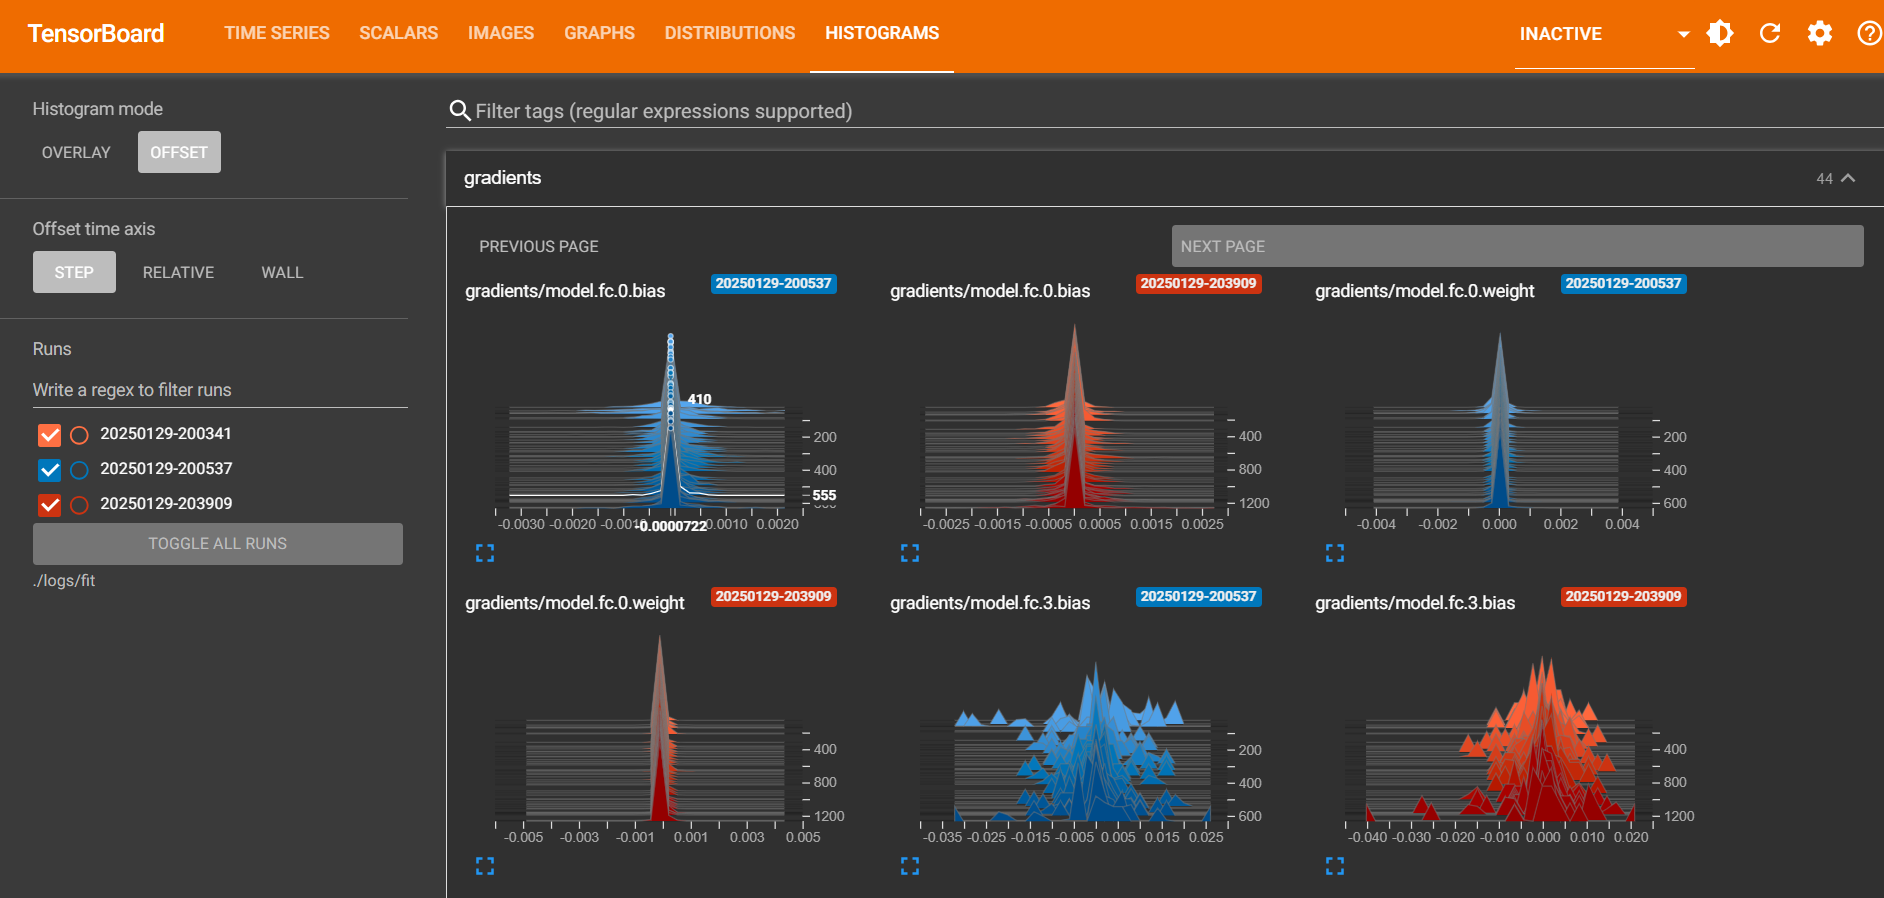

#